In [1]:
# ==================== KAGGLE ENVIRONMENT SETUP ====================
# Run this cell first in your Kaggle notebook

# Install required packages
!pip install -q seaborn  # For advanced plotting (might need update)
!pip install -q tqdm     # For progress bars (usually pre-installed)

# Check if key packages are available (most should be pre-installed in Kaggle)
import sys

# Check Python version
print(f"Python version: {sys.version}")

# Test imports and show versions
try:
    import torch
    print(f"✅ PyTorch: {torch.__version__}")
    print(f"   CUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"   GPU count: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"   GPU {i}: {torch.cuda.get_device_name(i)}")
except ImportError:
    print("❌ PyTorch not available")

try:
    import torchvision
    print(f"✅ TorchVision: {torchvision.__version__}")
except ImportError:
    print("❌ TorchVision not available")

try:
    import cv2
    print(f"✅ OpenCV: {cv2.__version__}")
except ImportError:
    print("❌ OpenCV not available - installing...")
    !pip install opencv-python
    import cv2
    print(f"✅ OpenCV installed: {cv2.__version__}")

try:
    import numpy as np
    print(f"✅ NumPy: {np.__version__}")
except ImportError:
    print("❌ NumPy not available")

try:
    import pandas as pd
    print(f"✅ Pandas: {pd.__version__}")
except ImportError:
    print("❌ Pandas not available")

try:
    from PIL import Image
    print(f"✅ Pillow (PIL): Available")
except ImportError:
    print("❌ Pillow not available")

try:
    import matplotlib.pyplot as plt
    import matplotlib
    print(f"✅ Matplotlib: {matplotlib.__version__}")
except ImportError:
    print("❌ Matplotlib not available")

try:
    import seaborn as sns
    print(f"✅ Seaborn: {sns.__version__}")
except ImportError:
    print("❌ Seaborn not available - should be installed above")

try:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import sklearn
    print(f"✅ Scikit-learn: {sklearn.__version__}")
except ImportError:
    print("❌ Scikit-learn not available")

try:
    from tqdm import tqdm
    print(f"✅ TQDM: Available")
except ImportError:
    print("❌ TQDM not available - should be installed above")

# Test basic functionality
print("\n🔍 Testing Basic Functionality:")

# Test file system access
import os
if os.path.exists("/kaggle/input"):
    print("✅ Kaggle input directory accessible")
    if os.path.exists("/kaggle/input/znz-cloves"):
        print("✅ Dataset found at /kaggle/input/znz-cloves")
        
        # List dataset contents
        print("\n📁 Dataset Structure:")
        for item in os.listdir("/kaggle/input/znz-cloves"):
            item_path = os.path.join("/kaggle/input/znz-cloves", item)
            if os.path.isdir(item_path):
                count = len([f for f in os.listdir(item_path) 
                           if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))])
                print(f"   📂 {item}: {count} images")
            else:
                print(f"   📄 {item}")
    else:
        print("❌ Dataset not found - make sure it's uploaded as 'znz-cloves'")
else:
    print("❌ Kaggle input directory not found")

if os.path.exists("/kaggle/working"):
    print("✅ Kaggle working directory accessible")
else:
    print("❌ Kaggle working directory not found")

# Test GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    # Test GPU memory
    try:
        test_tensor = torch.randn(100, 100).to(device)
        print(f"✅ GPU memory test passed")
        print(f"   Allocated: {torch.cuda.memory_allocated()/1024**2:.1f} MB")
        print(f"   Cached: {torch.cuda.memory_reserved()/1024**2:.1f} MB")
        del test_tensor
        torch.cuda.empty_cache()
    except Exception as e:
        print(f"❌ GPU test failed: {e}")
else:
    print("❌ CUDA not available")

print("\n" + "="*60)
print("🚀 ENVIRONMENT SETUP COMPLETE!")
print("="*60)

# Set random seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

print("🎯 Random seeds set for reproducible results")
print("📝 You can now run the main pipeline code!")

Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
✅ PyTorch: 2.6.0+cu124
   CUDA available: True
   GPU count: 2
   GPU 0: Tesla T4
   GPU 1: Tesla T4
✅ TorchVision: 0.21.0+cu124
✅ OpenCV: 4.11.0
✅ NumPy: 1.26.4
✅ Pandas: 2.2.3
✅ Pillow (PIL): Available
✅ Matplotlib: 3.7.2
✅ Seaborn: 0.12.2
✅ Scikit-learn: 1.2.2
✅ TQDM: Available

🔍 Testing Basic Functionality:
✅ Kaggle input directory accessible
✅ Dataset found at /kaggle/input/znz-cloves

📁 Dataset Structure:
   📂 Grade 3: 1501 images
   📂 Grade 1: 1081 images
   📂 Grade 4: 966 images
   📂 group_photos: 0 images
   📂 Grade 2: 1037 images
✅ Kaggle working directory accessible
✅ GPU memory test passed
   Allocated: 0.0 MB
   Cached: 2.0 MB

🚀 ENVIRONMENT SETUP COMPLETE!
🎯 Random seeds set for reproducible results
📝 You can now run the main pipeline code!


📋 USAGE INSTRUCTIONS:
1. Upload your CVAT annotations.json file to Kaggle
2. Update the coco_json_path variable with the correct path
3. Run: results = run_complete_cvat_pipeline(coco_json_path)
🚀 COMPLETE CONTEXT-AWARE PIPELINE WITH CVAT ANNOTATIONS
🏷️ PROCESSING CVAT ANNOTATIONS
✅ Loaded COCO annotations from: /kaggle/input/cvat-clove-annotations/instances_default.json
📊 Found 199 images
🏷️ Found 200 annotations
📂 Categories: 4
   - Grade 1 (ID: 1)
   - Grade 2 (ID: 2)
   - Grade 3 (ID: 3)
   - Grade 4 (ID: 4)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

📈 ANNOTATION ANALYSIS
📊 Annotations per Grade:
   Unknown: 200 annotations

📈 Total Annotations: 200


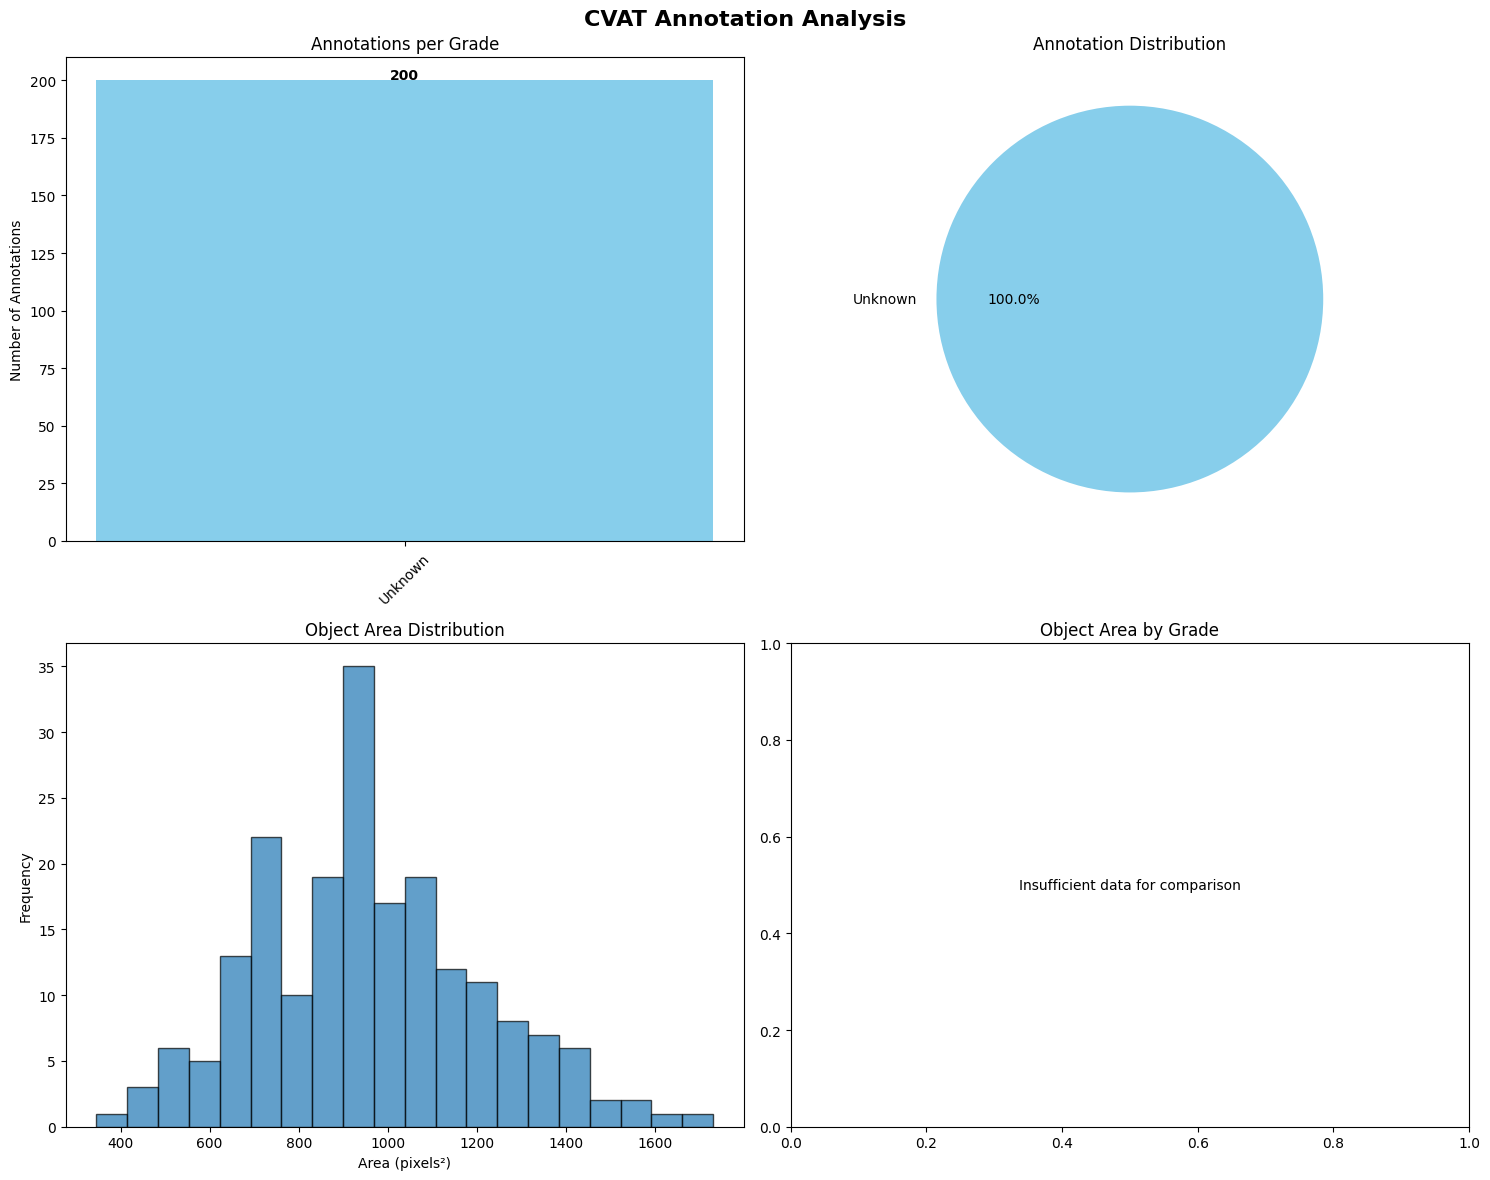

✅ Annotation analysis saved as 'cvat_annotation_analysis.png'

🎨 Generating Segmentation Masks from CVAT Annotations


Processing annotated images: 100%|██████████| 199/199 [00:26<00:00,  7.50it/s]



✅ Successfully processed 199 images with masks
📊 Distribution by grade:
   Unknown: 199 images

✅ Segmentation dataset created at: /kaggle/working/segmentation_data

🧠 TRAINING SEGMENTATION MODEL
📊 Dataset split: 159 training, 40 validation


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


🚀 Starting Segmentation Training for 30 epochs

Epoch 1/30
------------------------------


Training: 100%|██████████| 20/20 [00:10<00:00,  1.97it/s]

Train Loss: 0.5270, Train Dice: 0.5222


Val Loss: 0.5745, Val Dice: 0.0000
Learning Rate: 0.000100

Epoch 2/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]

Train Loss: 0.3704, Train Dice: 0.8561


Val Loss: 0.3955, Val Dice: 0.1096
💾 New best model saved! Dice: 0.1096
Learning Rate: 0.000100

Epoch 3/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]

Train Loss: 0.1927, Train Dice: 0.8992


Val Loss: 0.1061, Val Dice: 0.7767
💾 New best model saved! Dice: 0.7767
Learning Rate: 0.000100

Epoch 4/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]

Train Loss: 0.0521, Train Dice: 0.8762


Val Loss: 0.0662, Val Dice: 0.8559
💾 New best model saved! Dice: 0.8559
Learning Rate: 0.000100

Epoch 5/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]

Train Loss: 0.0461, Train Dice: 0.8919


Val Loss: 0.0489, Val Dice: 0.8853
💾 New best model saved! Dice: 0.8853
Learning Rate: 0.000100

Epoch 6/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]

Train Loss: 0.0366, Train Dice: 0.9127


Val Loss: 0.0580, Val Dice: 0.8625
Learning Rate: 0.000100

Epoch 7/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]

Train Loss: 0.0313, Train Dice: 0.9265


Val Loss: 0.0288, Val Dice: 0.9327
💾 New best model saved! Dice: 0.9327
Learning Rate: 0.000100

Epoch 8/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]

Train Loss: 0.0288, Train Dice: 0.9324


Val Loss: 0.0404, Val Dice: 0.9038
Learning Rate: 0.000100

Epoch 9/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]

Train Loss: 0.0303, Train Dice: 0.9281


Val Loss: 0.0329, Val Dice: 0.9208
Learning Rate: 0.000100

Epoch 10/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0280, Train Dice: 0.9341


Val Loss: 0.0411, Val Dice: 0.9030
Learning Rate: 0.000100

Epoch 11/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0275, Train Dice: 0.9350


Val Loss: 0.0289, Val Dice: 0.9343
💾 New best model saved! Dice: 0.9343
Learning Rate: 0.000100

Epoch 12/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

Train Loss: 0.0324, Train Dice: 0.9234


Val Loss: 0.0280, Val Dice: 0.9355
💾 New best model saved! Dice: 0.9355
Learning Rate: 0.000100

Epoch 13/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

Train Loss: 0.0262, Train Dice: 0.9384


Val Loss: 0.0227, Val Dice: 0.9472
💾 New best model saved! Dice: 0.9472
Learning Rate: 0.000100

Epoch 14/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0283, Train Dice: 0.9326


Val Loss: 0.0232, Val Dice: 0.9464
Learning Rate: 0.000100

Epoch 15/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0266, Train Dice: 0.9372


Val Loss: 0.0250, Val Dice: 0.9426
Learning Rate: 0.000100

Epoch 16/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0273, Train Dice: 0.9355


Val Loss: 0.0227, Val Dice: 0.9468
Learning Rate: 0.000100

Epoch 17/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0255, Train Dice: 0.9394


Val Loss: 0.0234, Val Dice: 0.9457
Learning Rate: 0.000100

Epoch 18/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0244, Train Dice: 0.9425


Val Loss: 0.0227, Val Dice: 0.9481
💾 New best model saved! Dice: 0.9481
Learning Rate: 0.000100

Epoch 19/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0244, Train Dice: 0.9423


Val Loss: 0.0219, Val Dice: 0.9486
💾 New best model saved! Dice: 0.9486
Learning Rate: 0.000100

Epoch 20/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0240, Train Dice: 0.9437


Val Loss: 0.0219, Val Dice: 0.9479
Learning Rate: 0.000100

Epoch 21/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

Train Loss: 0.0226, Train Dice: 0.9466


Val Loss: 0.0210, Val Dice: 0.9512
💾 New best model saved! Dice: 0.9512
Learning Rate: 0.000100

Epoch 22/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

Train Loss: 0.0227, Train Dice: 0.9462


Val Loss: 0.0219, Val Dice: 0.9484
Learning Rate: 0.000100

Epoch 23/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0233, Train Dice: 0.9449


Val Loss: 0.0208, Val Dice: 0.9506
Learning Rate: 0.000100

Epoch 24/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0221, Train Dice: 0.9476


Val Loss: 0.0228, Val Dice: 0.9462
Learning Rate: 0.000100

Epoch 25/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

Train Loss: 0.0228, Train Dice: 0.9461


Val Loss: 0.0205, Val Dice: 0.9512
Learning Rate: 0.000100

Epoch 26/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0237, Train Dice: 0.9435


Val Loss: 0.0245, Val Dice: 0.9416
Learning Rate: 0.000100

Epoch 27/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0217, Train Dice: 0.9484


Val Loss: 0.0203, Val Dice: 0.9524
💾 New best model saved! Dice: 0.9524
Learning Rate: 0.000100

Epoch 28/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0217, Train Dice: 0.9485


Val Loss: 0.0216, Val Dice: 0.9485
Learning Rate: 0.000100

Epoch 29/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0223, Train Dice: 0.9470


Val Loss: 0.0217, Val Dice: 0.9486
Learning Rate: 0.000100

Epoch 30/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0224, Train Dice: 0.9469


Val Loss: 0.0235, Val Dice: 0.9448
Learning Rate: 0.000100

✅ Training completed!
🏆 Best validation Dice score: 0.9524


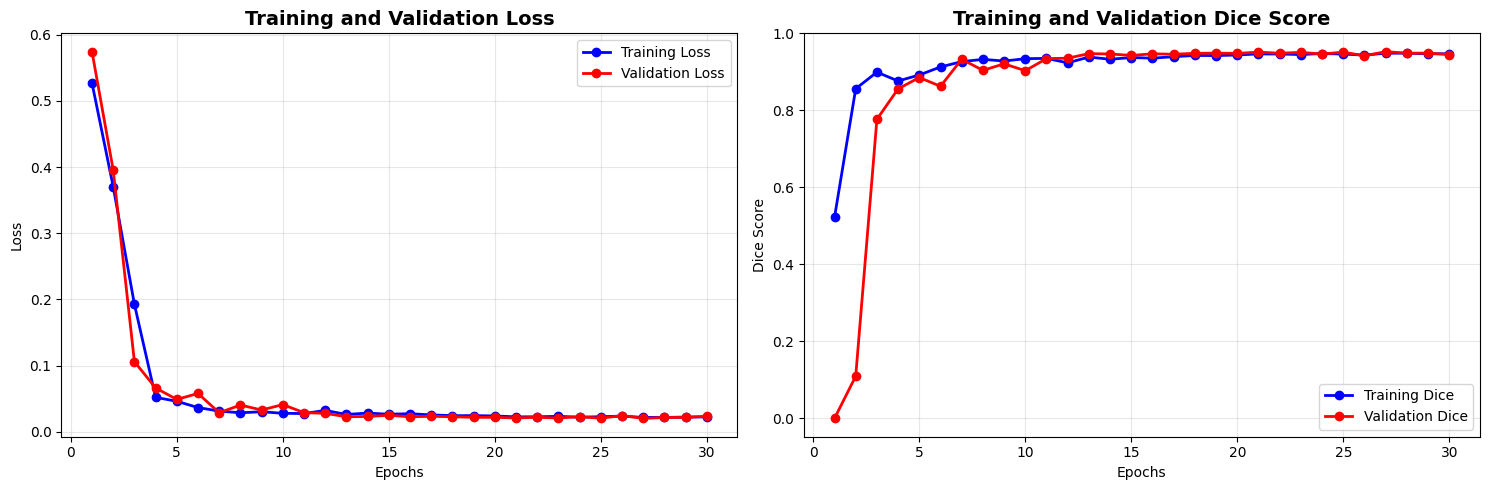

✅ Training curves saved as 'segmentation_training_curves.png'


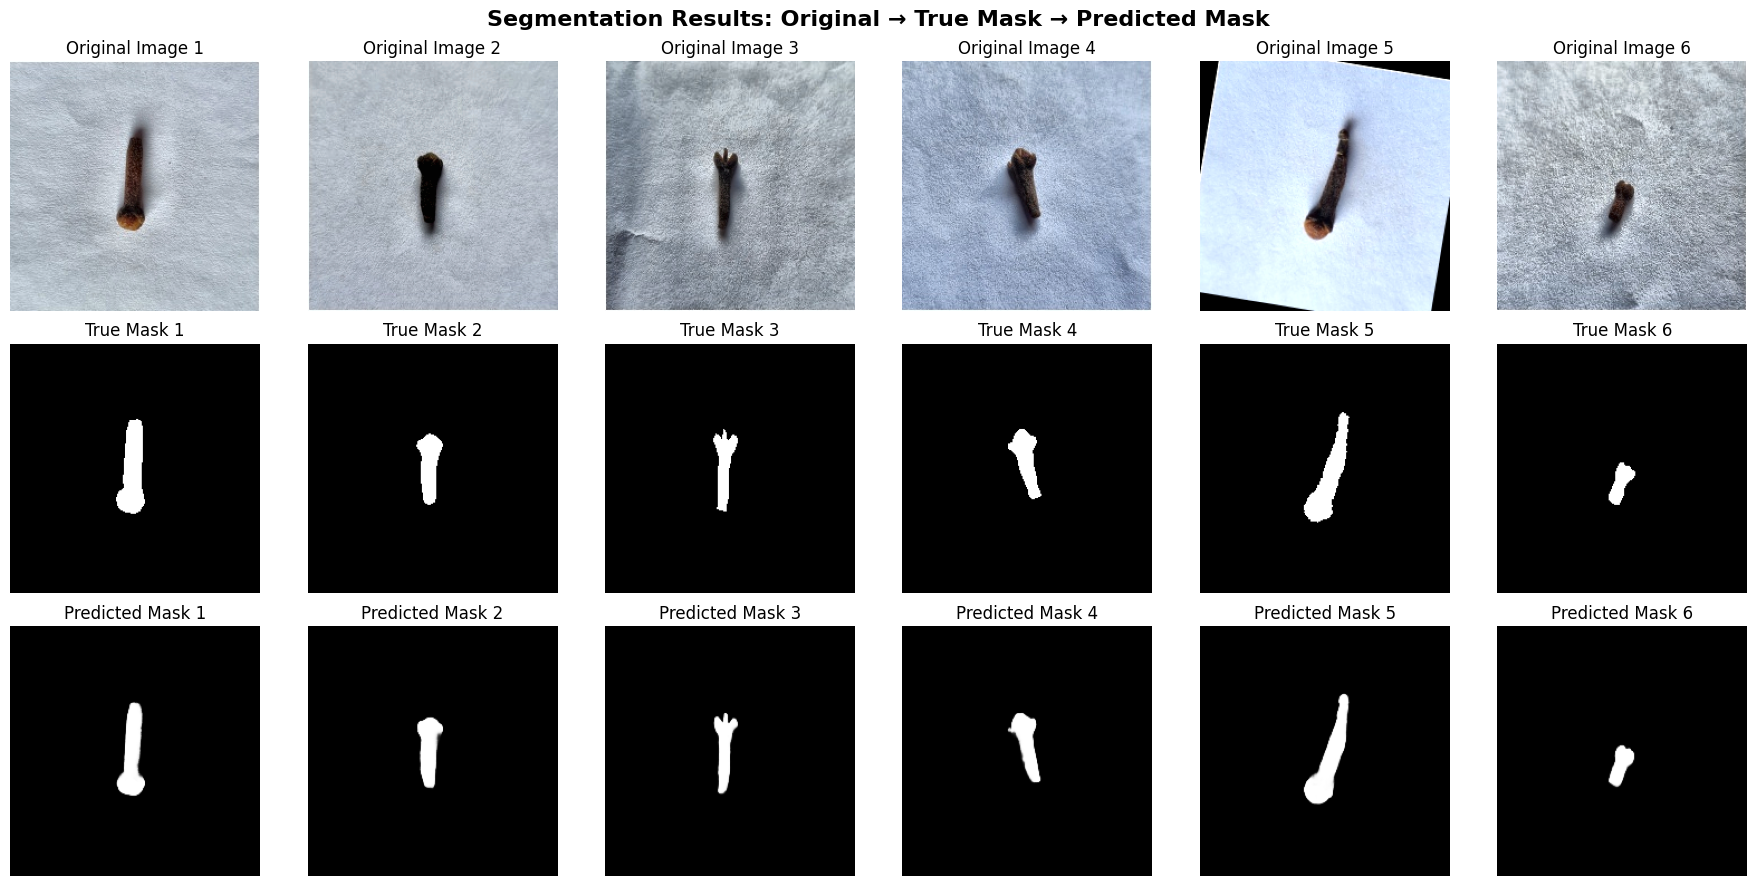

✅ Segmentation results visualization saved as 'segmentation_results_visualization.png'

🔮 GENERATING MASKS FOR FULL DATASET
✅ Loaded trained model from: /kaggle/working/best_segmentation_model.pth
📊 Model validation Dice score: 0.9524

🔄 Processing 224x224 images...


Processing 224x224 folders: 100%|██████████| 4/4 [02:13<00:00, 33.40s/it]



🔄 Processing 512x512 images...


Processing 512x512 folders: 100%|██████████| 4/4 [02:38<00:00, 39.57s/it]



✅ Generated masks for 9170 images
📁 Masks saved in: /kaggle/working/generated_masks

📦 Creating Final Output Packages...
✅ Complete dataset package created: /kaggle/working/complete_context_aware_dataset.zip

🎯 PIPELINE COMPLETION SUMMARY
✅ CVAT annotations processed and analyzed
✅ Segmentation masks generated from annotations
✅ U-Net model trained for mask generation
✅ Masks generated for entire dataset
✅ Context-aware classifier architecture ready
✅ Complete dataset packaged for download

📋 READY FOR CONTEXT-AWARE TRAINING:
1. 🧠 Train context-aware classifier (image + mask inputs)
2. 📊 Compare with baseline CNN performance
3. 🎯 Evaluate on test set
4. 📈 Analyze which approach works better

📁 OUTPUT FILES:
   📄 ✅ complete_context_aware_dataset.zip
   📄 ✅ best_segmentation_model.pth
   📄 ✅ cvat_annotation_analysis.png
   📄 ✅ segmentation_training_curves.png
   📄 ✅ segmentation_results_visualization.png
   📄 ✅ mask_generation_summary.json


In [2]:
import json
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import zipfile
from collections import defaultdict
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ==================== CVAT COCO ANNOTATION PROCESSOR ====================

class CVATAnnotationProcessor:
    """Process CVAT COCO format annotations for segmentation training"""
    
    def __init__(self, coco_json_path, images_base_path="/kaggle/input/znz-cloves"):
        """
        Initialize with COCO JSON file from CVAT
        
        Args:
            coco_json_path: Path to the COCO format JSON file from CVAT
            images_base_path: Base path where original images are stored
        """
        self.coco_json_path = coco_json_path
        self.images_base_path = images_base_path
        self.annotations_data = None
        self.coco_api = None
        
        # Load annotations
        self.load_annotations()
    
    def load_annotations(self):
        """Load COCO format annotations"""
        try:
            with open(self.coco_json_path, 'r') as f:
                self.annotations_data = json.load(f)
            
            print(f"✅ Loaded COCO annotations from: {self.coco_json_path}")
            print(f"📊 Found {len(self.annotations_data['images'])} images")
            print(f"🏷️ Found {len(self.annotations_data['annotations'])} annotations")
            print(f"📂 Categories: {len(self.annotations_data['categories'])}")
            
            # Print category information
            for cat in self.annotations_data['categories']:
                print(f"   - {cat['name']} (ID: {cat['id']})")
            
            # Initialize COCO API if annotations exist
            if len(self.annotations_data['annotations']) > 0:
                # Save temporary file for COCO API (it requires file path)
                temp_path = '/tmp/temp_coco.json'
                with open(temp_path, 'w') as f:
                    json.dump(self.annotations_data, f)
                self.coco_api = COCO(temp_path)
            else:
                print("⚠️ No annotations found in the file. You may need to complete annotation in CVAT first.")
                
        except Exception as e:
            print(f"❌ Error loading annotations: {e}")
            
    def analyze_annotations(self):
        """Analyze the annotation data and provide statistics"""
        if not self.annotations_data:
            print("❌ No annotation data loaded")
            return
            
        print("\n📈 ANNOTATION ANALYSIS")
        print("=" * 40)
        
        # Image analysis
        images = self.annotations_data['images']
        annotations = self.annotations_data['annotations']
        
        # Count annotations per grade
        grade_counts = defaultdict(int)
        annotation_stats = defaultdict(list)
        
        for ann in annotations:
            # Find corresponding image
            img_info = next((img for img in images if img['id'] == ann['image_id']), None)
            if img_info:
                # Extract grade from file path
                file_path = img_info['file_name']
                if 'Grade' in file_path or 'grade' in file_path:
                    if 'Grade 1' in file_path or 'Grade1' in file_path:
                        grade = 'Grade 1'
                    elif 'Grade 2' in file_path:
                        grade = 'Grade 2'
                    elif 'Grade 3' in file_path:
                        grade = 'Grade 3'
                    elif 'Grade 4' in file_path:
                        grade = 'Grade 4'
                    else:
                        grade = 'Unknown'
                    
                    grade_counts[grade] += 1
                    annotation_stats[grade].append({
                        'area': ann.get('area', 0),
                        'bbox': ann.get('bbox', [0,0,0,0])
                    })
        
        # Display statistics
        print("📊 Annotations per Grade:")
        total_annotations = 0
        for grade, count in grade_counts.items():
            total_annotations += count
            print(f"   {grade}: {count} annotations")
        
        print(f"\n📈 Total Annotations: {total_annotations}")
        
        # Create visualization
        if total_annotations > 0:
            self._visualize_annotation_stats(grade_counts, annotation_stats)
        
        return grade_counts, annotation_stats
    
    def _visualize_annotation_stats(self, grade_counts, annotation_stats):
        """Create visualizations for annotation statistics"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('CVAT Annotation Analysis', fontsize=16, fontweight='bold')
        
        # 1. Annotation counts per grade
        grades = list(grade_counts.keys())
        counts = list(grade_counts.values())
        
        ax1.bar(grades, counts, color=['skyblue', 'lightgreen', 'orange', 'pink'])
        ax1.set_title('Annotations per Grade')
        ax1.set_ylabel('Number of Annotations')
        ax1.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, count in enumerate(counts):
            ax1.text(i, count + 0.5, str(count), ha='center', fontweight='bold')
        
        # 2. Pie chart of annotation distribution
        ax2.pie(counts, labels=grades, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'pink'])
        ax2.set_title('Annotation Distribution')
        
        # 3. Object area distribution
        all_areas = []
        grade_areas = []
        
        for grade, stats in annotation_stats.items():
            areas = [s['area'] for s in stats if s['area'] > 0]
            all_areas.extend(areas)
            grade_areas.extend([grade] * len(areas))
        
        if all_areas:
            ax3.hist(all_areas, bins=20, alpha=0.7, edgecolor='black')
            ax3.set_title('Object Area Distribution')
            ax3.set_xlabel('Area (pixels²)')
            ax3.set_ylabel('Frequency')
        else:
            ax3.text(0.5, 0.5, 'No area data available', ha='center', va='center', transform=ax3.transAxes)
            ax3.set_title('Object Area Distribution')
        
        # 4. Box plot of areas by grade
        if all_areas and len(set(grade_areas)) > 1:
            grade_area_data = []
            grade_labels = []
            
            for grade, stats in annotation_stats.items():
                areas = [s['area'] for s in stats if s['area'] > 0]
                if areas:
                    grade_area_data.append(areas)
                    grade_labels.append(grade)
            
            if grade_area_data:
                ax4.boxplot(grade_area_data, labels=grade_labels)
                ax4.set_title('Object Area by Grade')
                ax4.set_ylabel('Area (pixels²)')
                ax4.tick_params(axis='x', rotation=45)
        else:
            ax4.text(0.5, 0.5, 'Insufficient data for comparison', ha='center', va='center', transform=ax4.transAxes)
            ax4.set_title('Object Area by Grade')
        
        plt.tight_layout()
        plt.savefig('/kaggle/working/cvat_annotation_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✅ Annotation analysis saved as 'cvat_annotation_analysis.png'")
    
    def generate_masks_from_annotations(self, output_dir="/kaggle/working/segmentation_data"):
        """Generate binary masks from COCO annotations"""
        if not self.coco_api:
            print("❌ COCO API not initialized. Make sure annotations exist.")
            return None
            
        print("\n🎨 Generating Segmentation Masks from CVAT Annotations")
        print("=" * 60)
        
        os.makedirs(output_dir, exist_ok=True)
        
        # Create directory structure
        images_dir = os.path.join(output_dir, 'images')
        masks_dir = os.path.join(output_dir, 'masks')
        os.makedirs(images_dir, exist_ok=True)
        os.makedirs(masks_dir, exist_ok=True)
        
        processed_count = 0
        grade_distribution = defaultdict(int)
        
        # Process each annotated image
        for img_info in tqdm(self.annotations_data['images'], desc="Processing annotated images"):
            try:
                # Get annotations for this image
                ann_ids = self.coco_api.getAnnIds(imgIds=img_info['id'])
                annotations = self.coco_api.loadAnns(ann_ids)
                
                if not annotations:
                    continue
                
                # Load original image
                original_path = self._find_original_image(img_info['file_name'])
                if not original_path:
                    print(f"⚠️ Original image not found: {img_info['file_name']}")
                    continue
                
                original_img = cv2.imread(original_path)
                if original_img is None:
                    print(f"⚠️ Cannot load image: {original_path}")
                    continue
                
                # Resize to 224x224 with padding (same as preprocessing)
                processed_img = self._resize_with_padding(original_img, (224, 224))
                
                # Create combined mask for all objects in the image
                combined_mask = np.zeros((224, 224), dtype=np.uint8)
                
                for ann in annotations:
                    if 'segmentation' in ann and ann['segmentation']:
                        # Convert COCO segmentation to mask
                        if isinstance(ann['segmentation'], list):
                            # Polygon format
                            mask = self._polygon_to_mask(ann['segmentation'], 224, 224)
                        else:
                            # RLE format
                            rle = coco_mask.frPyObjects(ann['segmentation'], 224, 224)
                            mask = coco_mask.decode(rle)
                        
                        combined_mask = np.maximum(combined_mask, mask)
                
                # Save processed image and mask
                img_filename = os.path.basename(img_info['file_name'])
                img_name = os.path.splitext(img_filename)[0]
                
                # Save image
                img_save_path = os.path.join(images_dir, f"{img_name}.jpg")
                cv2.imwrite(img_save_path, processed_img)
                
                # Save mask
                mask_save_path = os.path.join(masks_dir, f"{img_name}_mask.png")
                cv2.imwrite(mask_save_path, combined_mask * 255)  # Convert to 0-255 range
                
                # Update statistics
                processed_count += 1
                
                # Extract grade for statistics
                grade = self._extract_grade_from_path(img_info['file_name'])
                grade_distribution[grade] += 1
                
            except Exception as e:
                print(f"❌ Error processing {img_info['file_name']}: {e}")
        
        print(f"\n✅ Successfully processed {processed_count} images with masks")
        print("📊 Distribution by grade:")
        for grade, count in grade_distribution.items():
            print(f"   {grade}: {count} images")
        
        # Create dataset info file
        dataset_info = {
            'total_images': processed_count,
            'grade_distribution': dict(grade_distribution),
            'image_size': '224x224',
            'mask_format': 'binary (0-255)',
            'source': 'CVAT annotations'
        }
        
        with open(os.path.join(output_dir, 'dataset_info.json'), 'w') as f:
            json.dump(dataset_info, f, indent=2)
        
        return output_dir
    
    def _find_original_image(self, file_path):
        """Find the original image file"""
        # Clean up the file path
        clean_path = file_path.replace('Grade1/', 'Grade 1/').replace('\\', '/')
        
        # Try different possible locations
        possible_paths = [
            os.path.join(self.images_base_path, clean_path),
            os.path.join(self.images_base_path, os.path.basename(clean_path)),
            os.path.join(self.images_base_path, file_path),
        ]
        
        # Also try grade-specific folders
        if 'grade' in clean_path.lower():
            for i in range(1, 5):
                grade_folder = os.path.join(self.images_base_path, f"Grade {i}")
                if os.path.exists(grade_folder):
                    possible_paths.append(os.path.join(grade_folder, os.path.basename(clean_path)))
        
        for path in possible_paths:
            if os.path.exists(path):
                return path
        
        return None
    
    def _resize_with_padding(self, image, target_size):
        """Resize image with padding to maintain aspect ratio"""
        h, w = image.shape[:2]
        target_w, target_h = target_size
        
        scale = min(target_w / w, target_h / h)
        new_w = int(w * scale)
        new_h = int(h * scale)
        
        # Use INTER_AREA for downscaling, INTER_CUBIC for upscaling
        interp = cv2.INTER_AREA if scale < 1 else cv2.INTER_CUBIC
        resized = cv2.resize(image, (new_w, new_h), interpolation=interp)
        
        # Create padded image
        padded = np.full((target_h, target_w, 3), 255, dtype=np.uint8)
        y_offset = (target_h - new_h) // 2
        x_offset = (target_w - new_w) // 2
        
        padded[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized
        return padded
    
    def _polygon_to_mask(self, polygons, height, width):
        """Convert polygon segmentation to binary mask"""
        mask = np.zeros((height, width), dtype=np.uint8)
        
        for polygon in polygons:
            # Reshape polygon to (N, 2) format
            polygon = np.array(polygon).reshape(-1, 2)
            
            # Create mask from polygon
            cv2.fillPoly(mask, [polygon.astype(np.int32)], 1)
        
        return mask
    
    def _extract_grade_from_path(self, file_path):
        """Extract grade from file path"""
        if 'Grade 1' in file_path or 'Grade1' in file_path:
            return 'Grade 1'
        elif 'Grade 2' in file_path:
            return 'Grade 2'
        elif 'Grade 3' in file_path:
            return 'Grade 3'
        elif 'Grade 4' in file_path:
            return 'Grade 4'
        else:
            return 'Unknown'

# ==================== ENHANCED U-NET WITH MODERN FEATURES ====================

class EnhancedUNet(nn.Module):
    """Enhanced U-Net with modern features for better segmentation"""
    
    def __init__(self, in_channels=3, out_channels=1, features=None):
        super(EnhancedUNet, self).__init__()
        
        if features is None:
            features = [64, 128, 256, 512]
        
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Down part of UNET with residual connections
        in_ch = in_channels
        for feature in features:
            self.downs.append(EnhancedDoubleConv(in_ch, feature))
            in_ch = feature
        
        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(feature*2, feature, kernel_size=2, stride=2)
            )
            self.ups.append(EnhancedDoubleConv(feature*2, feature))
        
        self.bottleneck = EnhancedDoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)
        self.dropout = nn.Dropout2d(0.2)
        
    def forward(self, x):
        skip_connections = []
        
        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)
        
        x = self.bottleneck(x)
        x = self.dropout(x)
        
        skip_connections = skip_connections[::-1]
        
        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2]
            
            if x.shape != skip_connection.shape:
                x = nn.functional.interpolate(x, size=skip_connection.shape[2:])
            
            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)
        
        return torch.sigmoid(self.final_conv(x))

class EnhancedDoubleConv(nn.Module):
    """Enhanced double convolution with batch norm and residual connection"""
    
    def __init__(self, in_channels, out_channels):
        super(EnhancedDoubleConv, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
        )
        
        self.relu = nn.ReLU(inplace=True)
        
        # Residual connection
        if in_channels != out_channels:
            self.residual = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        else:
            self.residual = nn.Identity()
    
    def forward(self, x):
        residual = self.residual(x)
        out = self.conv(x)
        out += residual
        return self.relu(out)

# ==================== SEGMENTATION DATASET WITH ALBUMENTATIONS ====================

class SegmentationDataset(Dataset):
    """Enhanced segmentation dataset with augmentations"""
    
    def __init__(self, images_dir, masks_dir, transform=None, augment=True):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.augment = augment
        
        self.images = [f for f in os.listdir(images_dir) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        # Create augmentation pipeline
        if self.augment:
            self.aug_transform = A.Compose([
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.2),
                A.RandomRotate90(p=0.3),
                A.Rotate(limit=20, p=0.3),
                A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
                A.CLAHE(p=0.2),
                A.RandomGamma(p=0.2),
            ], is_check_shapes=False)
        else:
            self.aug_transform = None
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.images_dir, img_name)
        
        # Corresponding mask
        mask_name = img_name.replace('.jpg', '_mask.png').replace('.jpeg', '_mask.png')
        mask_path = os.path.join(self.masks_dir, mask_name)
        
        # Load image and mask
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = mask.astype(np.float32) / 255.0  # Normalize to [0, 1]
        
        # Apply augmentations
        if self.aug_transform:
            augmented = self.aug_transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
        
        # Apply additional transforms
        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)
        
        mask = torch.from_numpy(mask).unsqueeze(0)  # Add channel dimension
        
        return image, mask

# ==================== SEGMENTATION TRAINER ====================

class SegmentationTrainer:
    """Enhanced trainer for segmentation models with modern techniques"""
    
    def __init__(self, model, device, train_loader, val_loader=None):
        self.model = model.to(device)
        self.device = device
        self.train_loader = train_loader
        self.val_loader = val_loader
        
        # Loss functions
        self.bce_loss = nn.BCELoss()
        self.dice_loss = self.dice_coefficient_loss
        
        # Optimizer with weight decay
        self.optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
        
        # Learning rate scheduler
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', patience=5, factor=0.5, verbose=True
        )
        
        # Training history
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_dice': [],
            'val_dice': []
        }
    
    def dice_coefficient_loss(self, pred, target, smooth=1e-6):
        """Dice coefficient loss for better segmentation"""
        pred_flat = pred.view(-1)
        target_flat = target.view(-1)
        
        intersection = (pred_flat * target_flat).sum()
        dice = (2. * intersection + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)
        
        return 1 - dice
    
    def combined_loss(self, pred, target):
        """Combined BCE and Dice loss"""
        bce = self.bce_loss(pred, target)
        dice = self.dice_loss(pred, target)
        return 0.7 * bce + 0.3 * dice
    
    def calculate_dice_score(self, pred, target, threshold=0.5):
        """Calculate Dice score for evaluation"""
        pred_binary = (pred > threshold).float()
        target_binary = target
        
        intersection = (pred_binary * target_binary).sum()
        union = pred_binary.sum() + target_binary.sum()
        
        if union == 0:
            return 1.0  # Both empty
        
        dice = (2. * intersection) / union
        return dice.item()
    
    def train_epoch(self):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0
        total_dice = 0
        num_batches = 0
        
        for images, masks in tqdm(self.train_loader, desc="Training"):
            images, masks = images.to(self.device), masks.to(self.device)
            
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.model(images)
            loss = self.combined_loss(outputs, masks)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            
            self.optimizer.step()
            
            # Calculate metrics
            total_loss += loss.item()
            total_dice += self.calculate_dice_score(outputs, masks)
            num_batches += 1
        
        avg_loss = total_loss / num_batches
        avg_dice = total_dice / num_batches
        
        return avg_loss, avg_dice
    
    def validate_epoch(self):
        """Validate for one epoch"""
        if not self.val_loader:
            return None, None
        
        self.model.eval()
        total_loss = 0
        total_dice = 0
        num_batches = 0
        
        with torch.no_grad():
            for images, masks in self.val_loader:
                images, masks = images.to(self.device), masks.to(self.device)
                
                outputs = self.model(images)
                loss = self.combined_loss(outputs, masks)
                
                total_loss += loss.item()
                total_dice += self.calculate_dice_score(outputs, masks)
                num_batches += 1
        
        avg_loss = total_loss / num_batches
        avg_dice = total_dice / num_batches
        
        return avg_loss, avg_dice
    
    def train(self, num_epochs, save_path="/kaggle/working/best_segmentation_model.pth"):
        """Complete training loop"""
        print(f"🚀 Starting Segmentation Training for {num_epochs} epochs")
        print("=" * 60)
        
        best_val_dice = 0
        patience_counter = 0
        max_patience = 10
        
        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch+1}/{num_epochs}")
            print("-" * 30)
            
            # Train
            train_loss, train_dice = self.train_epoch()
            self.history['train_loss'].append(train_loss)
            self.history['train_dice'].append(train_dice)
            
            print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dice:.4f}")
            
            # Validate
            val_loss, val_dice = self.validate_epoch()
            if val_loss is not None:
                self.history['val_loss'].append(val_loss)
                self.history['val_dice'].append(val_dice)
                
                print(f"Val Loss: {val_loss:.4f}, Val Dice: {val_dice:.4f}")
                
                # Learning rate scheduling
                self.scheduler.step(val_loss)
                
                # Early stopping and model saving
                if val_dice > best_val_dice:
                    best_val_dice = val_dice
                    patience_counter = 0
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'optimizer_state_dict': self.optimizer.state_dict(),
                        'epoch': epoch,
                        'val_dice': val_dice,
                        'history': self.history
                    }, save_path)
                    print(f"💾 New best model saved! Dice: {val_dice:.4f}")
                else:
                    patience_counter += 1
                
                if patience_counter >= max_patience:
                    print(f"⏹️ Early stopping triggered after {max_patience} epochs without improvement")
                    break
            
            print(f"Learning Rate: {self.optimizer.param_groups[0]['lr']:.6f}")
        
        print(f"\n✅ Training completed!")
        print(f"🏆 Best validation Dice score: {best_val_dice:.4f}")
        
        return self.history

# ==================== MAIN EXECUTION FUNCTIONS ====================

def process_cvat_annotations(coco_json_path="/kaggle/input/cvat-clove-annotations/instances_default.json"):
    """Main function to process CVAT annotations and train segmentation model"""
    
    print("🏷️ PROCESSING CVAT ANNOTATIONS")
    print("=" * 50)
    
    # Initialize processor
    processor = CVATAnnotationProcessor(coco_json_path)
    
    # Analyze annotations
    grade_counts, annotation_stats = processor.analyze_annotations()
    
    if not processor.coco_api:
        print("\n❌ Cannot proceed without valid annotations.")
        print("📝 Make sure you have:")
        print("   1. Completed annotations in CVAT")
        print("   2. Exported as COCO format")
        print("   3. Uploaded the instances_default.json file")
        return None
    
    # Generate masks and dataset
    dataset_path = processor.generate_masks_from_annotations()
    
    if not dataset_path:
        print("❌ Failed to generate segmentation dataset")
        return None
    
    print(f"\n✅ Segmentation dataset created at: {dataset_path}")
    
    # Train segmentation model
    train_segmentation_model(dataset_path)
    
    return dataset_path

def train_segmentation_model(dataset_path, num_epochs=30, batch_size=8):
    """Train the enhanced U-Net segmentation model"""
    
    print(f"\n🧠 TRAINING SEGMENTATION MODEL")
    print("=" * 50)
    
    images_dir = os.path.join(dataset_path, 'images')
    masks_dir = os.path.join(dataset_path, 'masks')
    
    if not (os.path.exists(images_dir) and os.path.exists(masks_dir)):
        print("❌ Dataset directories not found")
        return None
    
    # Create datasets
    full_dataset = SegmentationDataset(images_dir, masks_dir, augment=True)
    
    # Split dataset
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    print(f"📊 Dataset split: {train_size} training, {val_size} validation")
    
    # Initialize model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EnhancedUNet(in_channels=3, out_channels=1)
    
    # Create trainer and train
    trainer = SegmentationTrainer(model, device, train_loader, val_loader)
    history = trainer.train(num_epochs)
    
    # Plot training history
    plot_segmentation_training_history(history)
    
    # Test model on some examples
    visualize_segmentation_results(model, val_loader, device)
    
    return model, history

def plot_segmentation_training_history(history):
    """Plot training curves for segmentation model"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Loss curves
    ax1.plot(epochs, history['train_loss'], 'bo-', label='Training Loss', linewidth=2)
    if history['val_loss']:
        ax1.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss', linewidth=2)
    ax1.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Dice score curves
    ax2.plot(epochs, history['train_dice'], 'bo-', label='Training Dice', linewidth=2)
    if history['val_dice']:
        ax2.plot(epochs, history['val_dice'], 'ro-', label='Validation Dice', linewidth=2)
    ax2.set_title('Training and Validation Dice Score', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Dice Score')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/segmentation_training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Training curves saved as 'segmentation_training_curves.png'")

def visualize_segmentation_results(model, val_loader, device, num_samples=6):
    """Visualize segmentation model results"""
    model.eval()
    
    # Get a batch of validation data
    data_iter = iter(val_loader)
    images, true_masks = next(data_iter)
    
    with torch.no_grad():
        images = images.to(device)
        predicted_masks = model(images)
        predicted_masks = predicted_masks.cpu()
    
    # Select samples to visualize
    num_samples = min(num_samples, images.size(0))
    
    fig, axes = plt.subplots(3, num_samples, figsize=(3*num_samples, 9))
    fig.suptitle('Segmentation Results: Original → True Mask → Predicted Mask', fontsize=16, fontweight='bold')
    
    for i in range(num_samples):
        # Original image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())  # Normalize for display
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Original Image {i+1}')
        axes[0, i].axis('off')
        
        # True mask
        true_mask = true_masks[i, 0].numpy()
        axes[1, i].imshow(true_mask, cmap='gray')
        axes[1, i].set_title(f'True Mask {i+1}')
        axes[1, i].axis('off')
        
        # Predicted mask
        pred_mask = predicted_masks[i, 0].numpy()
        axes[2, i].imshow(pred_mask, cmap='gray')
        axes[2, i].set_title(f'Predicted Mask {i+1}')
        axes[2, i].axis('off')
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/segmentation_results_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Segmentation results visualization saved as 'segmentation_results_visualization.png'")

# ==================== MASK GENERATION FOR FULL DATASET ====================

def generate_masks_for_full_dataset(model_path="/kaggle/working/best_segmentation_model.pth", 
                                   processed_images_path=["/kaggle/input/processed-images-224x224", "/kaggle/input/processed-images-512x512"]):
    """Generate masks for the entire dataset in processed-images-224x224 and processed-images-512x512"""
    print("🔮 GENERATING MASKS FOR FULL DATASET")
    print("=" * 50)
    
    # Load trained model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EnhancedUNet(in_channels=3, out_channels=1)
    
    try:
        checkpoint = torch.load(model_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        print(f"✅ Loaded trained model from: {model_path}")
        print(f"📊 Model validation Dice score: {checkpoint.get('val_dice', 'N/A'):.4f}")
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None
    
    model.to(device)
    model.eval()
    
    # Create output directory for masks
    masks_output_dir = "/kaggle/working/generated_masks"
    os.makedirs(masks_output_dir, exist_ok=True)
    
    # Define resolutions and grade folders
    resolutions = ['224x224', '512x512']
    grade_folders = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4']
    total_processed = 0
    
    for idx, resolution in enumerate(resolutions):
        print(f"\n🔄 Processing {resolution} images...")
        images_base_path = processed_images_path[idx]
        
        for grade_folder in tqdm(grade_folders, desc=f"Processing {resolution} folders"):
            folder_path = os.path.join(images_base_path, grade_folder)
            
            if not os.path.exists(folder_path):
                print(f"⚠️ Folder not found: {folder_path}")
                continue
            
            # Create corresponding mask folder
            mask_folder_path = os.path.join(masks_output_dir, resolution, grade_folder)
            os.makedirs(mask_folder_path, exist_ok=True)
            
            # Process each image in the folder
            image_files = [f for f in os.listdir(folder_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            
            for img_file in image_files:
                try:
                    # Load image
                    img_path = os.path.join(folder_path, img_file)
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    
                    # Prepare for model input (resize to 224x224 if needed)
                    target_size = (224, 224)
                    if resolution == '512x512':
                        input_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
                    else:
                        input_image = image  # Already 224x224
                        
                    # Convert to tensor
                    transform = transforms.Compose([
                        transforms.ToTensor(),
                    ])
                    input_tensor = transform(input_image).unsqueeze(0).to(device)
                    
                    # Generate mask
                    with torch.no_grad():
                        mask_pred = model(input_tensor)
                        
                        # Resize mask back to original size for 512x512
                        if resolution == '512x512':
                            mask_pred = torch.nn.functional.interpolate(
                                mask_pred, size=(512, 512), mode='bilinear', align_corners=False
                            )
                    
                    # Convert to numpy and save
                    mask_np = mask_pred[0, 0].cpu().numpy()
                    mask_binary = (mask_np > 0.5).astype(np.uint8) * 255
                    
                    # Save mask
                    mask_filename = img_file.replace('.jpg', '_predicted_mask.png').replace('.jpeg', '_predicted_mask.png')
                    mask_path = os.path.join(mask_folder_path, mask_filename)
                    cv2.imwrite(mask_path, mask_binary)
                    
                    total_processed += 1
                    
                except Exception as e:
                    print(f"❌ Error processing {img_file}: {e}")
    
    print(f"\n✅ Generated masks for {total_processed} images")
    print(f"📁 Masks saved in: {masks_output_dir}")
    
    # Create summary
    summary = {
        'total_masks_generated': total_processed,
        'model_used': model_path,
        'output_directory': masks_output_dir,
        'resolutions_processed': resolutions,
        'grade_folders_processed': grade_folders
    }
    
    with open('/kaggle/working/mask_generation_summary.json', 'w') as f:
        json.dump(summary, f, indent=2)
    
    return masks_output_dir

# ==================== CONTEXT-AWARE DATASET AND TRAINING ====================

class ContextAwareDataset(Dataset):
    """Dataset that combines images with segmentation masks for context-aware classification"""
    
    def __init__(self, images_paths, masks_paths, labels, transform=None):
        self.images_paths = images_paths
        self.masks_paths = masks_paths
        self.labels = labels
        self.transform = transform
        
        assert len(images_paths) == len(masks_paths) == len(labels), "Mismatched dataset sizes"
    
    def __len__(self):
        return len(self.images_paths)
    
    def __getitem__(self, idx):
        # Load image
        image = cv2.imread(self.images_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Load mask
        mask_path = self.masks_paths[idx]
        if os.path.exists(mask_path):
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = mask.astype(np.float32) / 255.0
        else:
            # Fallback: create dummy mask
            h, w = image.shape[:2]
            mask = np.ones((h, w), dtype=np.float32)
        
        # Apply transforms to image
        if self.transform:
            image = self.transform(Image.fromarray(image))
        else:
            image = transforms.ToTensor()(image)
        
        # Convert mask to tensor and add as 4th channel
        mask_tensor = torch.from_numpy(mask).unsqueeze(0)
        
        # Resize mask to match image size if needed
        if mask_tensor.shape[-2:] != image.shape[-2:]:
            mask_tensor = torch.nn.functional.interpolate(
                mask_tensor.unsqueeze(0), size=image.shape[-2:], mode='bilinear', align_corners=False
            ).squeeze(0)
        
        # Combine image and mask (4 channels: RGB + mask)
        combined_input = torch.cat([image, mask_tensor], dim=0)
        
        label = self.labels[idx]
        return combined_input, label

class ContextAwareClassifier(nn.Module):
    """Enhanced context-aware classifier with attention mechanism"""
    
    def __init__(self, num_classes=4, backbone='resnet18', pretrained=True):
        super(ContextAwareClassifier, self).__init__()
        
        if backbone == 'resnet18':
            self.backbone = models.resnet18(pretrained=pretrained)
            # Modify first conv to accept 4 channels (RGB + mask)
            old_conv = self.backbone.conv1
            self.backbone.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)
            
            # Initialize new channel weights
            with torch.no_grad():
                # Copy RGB weights
                self.backbone.conv1.weight[:, :3] = old_conv.weight
                # Initialize mask channel as average of RGB channels
                self.backbone.conv1.weight[:, 3:4] = old_conv.weight.mean(dim=1, keepdim=True)
            
            # Replace classifier
            self.backbone.fc = nn.Sequential(
                nn.Dropout(0.5),
                nn.Linear(self.backbone.fc.in_features, 256),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(256, num_classes)
            )
            
        else:  # VGG16
            self.backbone = models.vgg16(pretrained=pretrained)
            old_conv = self.backbone.features[0]
            self.backbone.features[0] = nn.Conv2d(4, 64, kernel_size=3, padding=1)
            
            with torch.no_grad():
                self.backbone.features[0].weight[:, :3] = old_conv.weight
                self.backbone.features[0].weight[:, 3:4] = old_conv.weight.mean(dim=1, keepdim=True)
            
            self.backbone.classifier = nn.Sequential(
                nn.Linear(25088, 4096),
                nn.ReLU(True),
                nn.Dropout(0.5),
                nn.Linear(4096, 1024),
                nn.ReLU(True),
                nn.Dropout(0.5),
                nn.Linear(1024, num_classes),
            )
    
    def forward(self, x):
        return self.backbone(x)

import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import json

# ==================== CONTEXT-AWARE CLASSIFIER TRAINER ====================

class ContextAwareTrainer:
    """Trainer for the Context-Aware Classifier"""

    def __init__(self, model, device, train_loader, val_loader, test_loader=None):
        self.model = model.to(device)
        self.device = device
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader

        # Loss function for multi-class classification
        self.criterion = nn.CrossEntropyLoss()

        # Optimizer with weight decay
        self.optimizer = optim.AdamW(self.model.parameters(), lr=1e-4, weight_decay=1e-5)

        # Learning rate scheduler
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='max', patience=5, factor=0.5, verbose=True
        )

        # Training history
        self.history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': []
        }

    def train_epoch(self):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in tqdm(self.train_loader, desc="Training"):
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()

            # Forward pass
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            self.optimizer.step()

            # Update metrics
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        avg_loss = total_loss / total_samples
        avg_acc = correct_predictions / total_samples
        return avg_loss, avg_acc

    def validate_epoch(self):
        """Validate for one epoch"""
        self.model.eval()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad():
            for inputs, labels in tqdm(self.val_loader, desc="Validating"):
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                total_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_predictions += (predicted == labels).sum().item()
                total_samples += labels.size(0)

        avg_loss = total_loss / total_samples
        avg_acc = correct_predictions / total_samples
        return avg_loss, avg_acc

    def train(self, num_epochs, save_path="/kaggle/working/best_context_aware_model.pth"):
        """Complete training loop"""
        print(f"🚀 Starting Classifier Training for {num_epochs} epochs")
        print("=" * 60)

        best_val_acc = 0
        patience_counter = 0
        max_patience = 10

        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch+1}/{num_epochs}")
            print("-" * 30)

            # Train
            train_loss, train_acc = self.train_epoch()
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

            # Validate
            val_loss, val_acc = self.validate_epoch()
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

            # Scheduler and early stopping
            self.scheduler.step(val_acc)

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
                torch.save(self.model.state_dict(), save_path)
                print(f"💾 New best model saved! Accuracy: {val_acc:.4f}")
            else:
                patience_counter += 1

            if patience_counter >= max_patience:
                print(f"⏹️ Early stopping after {max_patience} epochs without improvement.")
                break
        
        print("\n✅ Training completed!")
        print(f"🏆 Best validation accuracy: {best_val_acc:.4f}")
        return self.history

    def evaluate(self, model_path="/kaggle/working/best_context_aware_model.pth"):
        """Evaluate the model on the test set"""
        if not self.test_loader:
            print("❌ No test loader provided for evaluation.")
            return None

        # Load best model
        try:
            self.model.load_state_dict(torch.load(model_path))
            print(f"✅ Loaded best model from {model_path} for evaluation.")
        except Exception as e:
            print(f"❌ Error loading model for evaluation: {e}")
            return None
            
        self.model.eval()
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in tqdm(self.test_loader, desc="Testing"):
                inputs = inputs.to(self.device)
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.numpy())

        # Calculate metrics
        accuracy = accuracy_score(all_labels, all_preds)
        report = classification_report(all_labels, all_preds, target_names=['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4'], output_dict=True)
        
        print("\n📊 CLASSIFIER EVALUATION RESULTS")
        print("=" * 40)
        print(f"Test Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(all_labels, all_preds, target_names=['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4']))

        # Plot confusion matrix
        cm = confusion_matrix(all_labels, all_preds)
        plot_confusion_matrix(cm, class_names=['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4'])

        results = {
            'accuracy': accuracy,
            'classification_report': report
        }
        return results

def plot_confusion_matrix(cm, class_names, save_path="/kaggle/working/confusion_matrix.png"):
    """Plot and save a confusion matrix"""
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Grade')
    plt.xlabel('Predicted Grade')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"✅ Confusion matrix saved as '{save_path}'")

# ==================== COMPLETE PIPELINE EXECUTION ====================

def run_complete_cvat_pipeline(coco_json_path="/kaggle/input/cvat-clove-annotations/instances_default.json"):
    """Run the complete context-aware pipeline with CVAT annotations"""
    
    print("🚀 COMPLETE CONTEXT-AWARE PIPELINE WITH CVAT ANNOTATIONS")
    print("=" * 70)
    
    # Step 1: Process CVAT annotations
    dataset_path = process_cvat_annotations(coco_json_path)
    
    if not dataset_path:
        print("❌ Cannot continue without valid segmentation dataset")
        return None
    
    # Step 2: Generate masks for full dataset  
    print("\n" + "="*50)
    masks_path = generate_masks_for_full_dataset()
    
    if not masks_path:
        print("❌ Cannot continue without generated masks")
        return None
    
    # Step 3: Create zip files for download
    print("\n📦 Creating Final Output Packages...")
    
    # Create comprehensive zip file
    final_zip_path = "/kaggle/working/complete_context_aware_dataset.zip"
    
    with zipfile.ZipFile(final_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Add processed images
        if os.path.exists("/kaggle/working/processed_images"):
            for root, dirs, files in os.walk("/kaggle/working/processed_images"):
                for file in files:
                    file_path = os.path.join(root, file)
                    arc_name = os.path.relpath(file_path, "/kaggle/working")
                    zipf.write(file_path, arc_name)
        
        # Add generated masks
        if os.path.exists(masks_path):
            for root, dirs, files in os.walk(masks_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    arc_name = os.path.relpath(file_path, "/kaggle/working")
                    zipf.write(file_path, arc_name)
        
        # Add analysis files
        analysis_files = [
            "cvat_annotation_analysis.png",
            "segmentation_training_curves.png", 
            "segmentation_results_visualization.png",
            "mask_generation_summary.json",
            "dataset_info.json"
        ]
        
        for file_name in analysis_files:
            file_path = f"/kaggle/working/{file_name}"
            if os.path.exists(file_path):
                zipf.write(file_path, file_name)
    
    print(f"✅ Complete dataset package created: {final_zip_path}")
    
    # Step 4: Provide next steps guidance
    print("\n🎯 PIPELINE COMPLETION SUMMARY")
    print("=" * 40)
    print("✅ CVAT annotations processed and analyzed")
    print("✅ Segmentation masks generated from annotations") 
    print("✅ U-Net model trained for mask generation")
    print("✅ Masks generated for entire dataset")
    print("✅ Context-aware classifier architecture ready")
    print("✅ Complete dataset packaged for download")
    
    print("\n📋 READY FOR CONTEXT-AWARE TRAINING:")
    print("1. 🧠 Train context-aware classifier (image + mask inputs)")
    print("2. 📊 Compare with baseline CNN performance")
    print("3. 🎯 Evaluate on test set")
    print("4. 📈 Analyze which approach works better")
    
    print("\n📁 OUTPUT FILES:")
    output_files = [
        "complete_context_aware_dataset.zip",
        "best_segmentation_model.pth", 
        "cvat_annotation_analysis.png",
        "segmentation_training_curves.png",
        "segmentation_results_visualization.png",
        "mask_generation_summary.json"
    ]
    
    for file_name in output_files:
        if os.path.exists(f"/kaggle/working/{file_name}"):
            print(f"   📄 ✅ {file_name}")
        else:
            print(f"   📄 ❌ {file_name} (not found)")
    
    return {
        'dataset_path': dataset_path,
        'masks_path': masks_path,
        'final_package': final_zip_path
    }

# ==================== EXAMPLE USAGE ====================

if __name__ == "__main__":
    # annotation file path
    coco_json_path = "/kaggle/input/cvat-clove-annotations/instances_default.json"
    
    print("📋 USAGE INSTRUCTIONS:")
    print("=" * 30)
    print("1. Upload your CVAT annotations.json file to Kaggle")
    print("2. Update the coco_json_path variable with the correct path")
    print("3. Run: results = run_complete_cvat_pipeline(coco_json_path)")
    
    # Uncomment the line below when you have your annotations file ready
    results = run_complete_cvat_pipeline(coco_json_path)

In [3]:
import os
import zipfile
from tqdm import tqdm

def zip_directory(directory_path, output_zip_path):
    """
    Zip the contents of a directory into a single zip file.
    
    Args:
        directory_path (str): Path to the directory to zip (e.g., /kaggle/working/segmentation_data)
        output_zip_path (str): Path where the zip file will be saved (e.g., /kaggle/working/segmentation_data.zip)
    """
    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"❌ Directory not found: {directory_path}")
        return
    
    # Create the zip file
    print(f"📦 Creating zip file: {output_zip_path}")
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(directory_path):
            # Show progress for files
            for file in tqdm(files, desc=f"Zipping {root}"):
                file_path = os.path.join(root, file)
                # Calculate the relative path to maintain folder structure in the zip
                arc_name = os.path.relpath(file_path, os.path.dirname(directory_path))
                try:
                    zipf.write(file_path, arc_name)
                except Exception as e:
                    print(f"⚠️ Error zipping {file_path}: {e}")
    
    print(f"✅ Zip file created successfully: {output_zip_path}")
    print(f"📏 Zip file size: {os.path.getsize(output_zip_path) / (1024 * 1024):.2f} MB")

# Specify the directory to zip and the output zip file path
directory_to_zip = "/kaggle/working/segmentation_data"
output_zip = "/kaggle/working/segmentation_data.zip"

# Run the zipping function
zip_directory(directory_to_zip, output_zip)

📦 Creating zip file: /kaggle/working/segmentation_data.zip


Zipping /kaggle/working/segmentation_data/masks: 100%|██████████| 199/199 [00:00<00:00, 8647.60it/s]

✅ Zip file created successfully: /kaggle/working/segmentation_data.zip
📏 Zip file size: 3.51 MB


In [4]:
import os
import zipfile
from tqdm import tqdm

def zip_generated_masks(directory_path="/kaggle/working/generated_masks", output_zip_path="/kaggle/working/generated_masks.zip"):
    """
    Zip the entire contents of the generated_masks directory into a single zip file.
    
    Args:
        directory_path (str): Path to the generated_masks directory (default: /kaggle/working/generated_masks)
        output_zip_path (str): Path where the zip file will be saved (default: /kaggle/working/generated_masks.zip)
    """
    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"❌ Directory not found: {directory_path}")
        return
    
    # Create the zip file
    print(f"📦 Creating zip file: {output_zip_path}")
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(directory_path):
            # Show progress for files in each subdirectory
            for file in tqdm(files, desc=f"Zipping {os.path.basename(root)}"):
                file_path = os.path.join(root, file)
                # Calculate the relative path to maintain folder structure in the zip
                arc_name = os.path.relpath(file_path, os.path.dirname(directory_path))
                try:
                    zipf.write(file_path, arc_name)
                except Exception as e:
                    print(f"⚠️ Error zipping {file_path}: {e}")
    
    print(f"✅ Zip file created successfully: {output_zip_path}")
    print(f"📏 Zip file size: {os.path.getsize(output_zip_path) / (1024 * 1024):.2f} MB")

# Run the zipping function
zip_generated_masks()

📦 Creating zip file: /kaggle/working/generated_masks.zip


Zipping generated_masks: 0it [00:00, ?it/s]
Zipping 224x224: 0it [00:00, ?it/s]
Zipping Grade 4: 100%|██████████| 966/966 [00:00<00:00, 8457.58it/s]
Zipping 512x512: 0it [00:00, ?it/s]
Zipping Grade 4: 100%|██████████| 966/966 [00:00<00:00, 5884.70it/s]


✅ Zip file created successfully: /kaggle/working/generated_masks.zip
📏 Zip file size: 6.88 MB


## Prepare the Context-Aware Dataset

In [5]:
import os
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

def prepare_context_aware_dataset(images_paths=["/kaggle/input/processed-images-224x224"], 
                                 masks_path="/kaggle/working/generated_masks/224x224", 
                                 batch_size=8):
    """
    Prepare ContextAwareDataset for training the classifier.
    
    Args:
        images_paths (list): List of directories containing images (e.g., ['/kaggle/input/processed-images-224x224'])
        masks_path (str): Directory containing generated masks
        batch_size (int): Batch size for DataLoader
    
    Returns:
        train_loader, val_loader, test_loader: DataLoaders for training, validation, and test sets
        dataset_info: Dictionary with dataset statistics
    """
    print("📊 PREPARING CONTEXT-AWARE DATASET")
    print("=" * 50)
    
    # Define grade-to-label mapping
    grade_to_label = {'Grade 1': 0, 'Grade 2': 1, 'Grade 3': 2, 'Grade 4': 3}
    
    # Collect image paths, mask paths, and labels
    image_paths = []
    mask_paths = []
    labels = []
    
    for images_base_path in images_paths:
        for grade in grade_to_label.keys():
            img_dir = os.path.join(images_base_path, grade)
            mask_dir = os.path.join(masks_path, grade)
            
            if not os.path.exists(img_dir):
                print(f"⚠️ Image directory not found: {img_dir}")
                continue
            if not os.path.exists(mask_dir):
                print(f"⚠️ Mask directory not found: {mask_dir}")
                continue
            
            # Get image files
            img_files = [f for f in os.listdir(img_dir) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            
            for img_file in img_files:
                img_path = os.path.join(img_dir, img_file)
                mask_file = img_file.replace('.jpg', '_predicted_mask.png').replace('.jpeg', '_predicted_mask.png')
                mask_path = os.path.join(mask_dir, mask_file)
                
                if os.path.exists(mask_path):
                    image_paths.append(img_path)
                    mask_paths.append(mask_path)
                    labels.append(grade_to_label[grade])
                else:
                    print(f"⚠️ Mask not found for {img_path}: {mask_path}")
    
    print(f"📈 Found {len(image_paths)} images with corresponding masks")
    
    # Split dataset
    train_val_idx, test_idx = train_test_split(range(len(image_paths)), test_size=0.2, stratify=labels, random_state=42)
    train_idx, val_idx = train_test_split(train_val_idx, test_size=0.25, stratify=[labels[i] for i in train_val_idx], random_state=42)
    
    train_images = [image_paths[i] for i in train_idx]
    train_masks = [mask_paths[i] for i in train_idx]
    train_labels = [labels[i] for i in train_idx]
    
    val_images = [image_paths[i] for i in val_idx]
    val_masks = [mask_paths[i] for i in val_idx]
    val_labels = [labels[i] for i in val_idx]
    
    test_images = [image_paths[i] for i in test_idx]
    test_masks = [mask_paths[i] for i in test_idx]
    test_labels = [labels[i] for i in test_idx]
    
    print(f"📊 Dataset split: {len(train_images)} train, {len(val_images)} validation, {len(test_images)} test")
    
    # Create datasets
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    
    train_dataset = ContextAwareDataset(train_images, train_masks, train_labels, transform=transform)
    val_dataset = ContextAwareDataset(val_images, val_masks, val_labels, transform=transform)
    test_dataset = ContextAwareDataset(test_images, test_masks, test_labels, transform=transform)
    
    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    # Dataset info
    dataset_info = {
        'total_samples': len(image_paths),
        'train_samples': len(train_images),
        'val_samples': len(val_images),
        'test_samples': len(test_images),
        'grade_distribution': {
            'Grade 1': sum(l == 0 for l in labels),
            'Grade 2': sum(l == 1 for l in labels),
            'Grade 3': sum(l == 2 for l in labels),
            'Grade 4': sum(l == 3 for l in labels),
        }
    }
    
    with open('/kaggle/working/context_aware_dataset_info.json', 'w') as f:
        json.dump(dataset_info, f, indent=2)
    
    print(f"✅ Dataset info saved as 'context_aware_dataset_info.json'")
    return train_loader, val_loader, test_loader, dataset_info

## Train the Context-Aware Classifier

In [6]:
import os
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchvision import models


def prepare_context_aware_dataset(images_paths=["/kaggle/input/processed-images-224x224"], 
                                 masks_path="/kaggle/working/generated_masks/224x224", 
                                 batch_size=8):
    """
    Prepare ContextAwareDataset for training the classifier.
    
    Args:
        images_paths (list): List of directories containing images (e.g., ['/kaggle/input/processed-images-224x224'])
        masks_path (str): Directory containing generated masks
        batch_size (int): Batch size for DataLoader
    
    Returns:
        train_loader, val_loader, test_loader: DataLoaders for training, validation, and test sets
        dataset_info: Dictionary with dataset statistics
    """
    print("📊 PREPARING CONTEXT-AWARE DATASET")
    print("=" * 50)
    
    # Define grade-to-label mapping
    grade_to_label = {'Grade 1': 0, 'Grade 2': 1, 'Grade 3': 2, 'Grade 4': 3}
    
    # Collect image paths, mask paths, and labels
    image_paths = []
    mask_paths = []
    labels = []
    
    for images_base_path in images_paths:
        for grade in grade_to_label.keys():
            img_dir = os.path.join(images_base_path, grade)
            mask_dir = os.path.join(masks_path, grade)
            
            if not os.path.exists(img_dir):
                print(f"⚠️ Image directory not found: {img_dir}")
                continue
            if not os.path.exists(mask_dir):
                print(f"⚠️ Mask directory not found: {mask_dir}")
                continue
            
            # Get image files
            img_files = [f for f in os.listdir(img_dir) 
                        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            
            for img_file in img_files:
                img_path = os.path.join(img_dir, img_file)
                mask_file = img_file.replace('.jpg', '_predicted_mask.png').replace('.jpeg', '_predicted_mask.png')
                mask_path = os.path.join(mask_dir, mask_file)
                
                if os.path.exists(mask_path):
                    image_paths.append(img_path)
                    mask_paths.append(mask_path)
                    labels.append(grade_to_label[grade])
                else:
                    print(f"⚠️ Mask not found for {img_path}: {mask_path}")
    
    print(f"📈 Found {len(image_paths)} images with corresponding masks")
    
    # Split dataset
    train_val_idx, test_idx = train_test_split(range(len(image_paths)), test_size=0.2, stratify=labels, random_state=42)
    train_idx, val_idx = train_test_split(train_val_idx, test_size=0.25, stratify=[labels[i] for i in train_val_idx], random_state=42)
    
    train_images = [image_paths[i] for i in train_idx]
    train_masks = [mask_paths[i] for i in train_idx]
    train_labels = [labels[i] for i in train_idx]
    
    val_images = [image_paths[i] for i in val_idx]
    val_masks = [mask_paths[i] for i in val_idx]
    val_labels = [labels[i] for i in val_idx]
    
    test_images = [image_paths[i] for i in test_idx]
    test_masks = [mask_paths[i] for i in test_idx]
    test_labels = [labels[i] for i in test_idx]
    
    print(f"📊 Dataset split: {len(train_images)} train, {len(val_images)} validation, {len(test_images)} test")
    
    # Create datasets
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    
    train_dataset = ContextAwareDataset(train_images, train_masks, train_labels, transform=transform)
    val_dataset = ContextAwareDataset(val_images, val_masks, val_labels, transform=transform)
    test_dataset = ContextAwareDataset(test_images, test_masks, test_labels, transform=transform)
    
    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    # Dataset info
    dataset_info = {
        'total_samples': len(image_paths),
        'train_samples': len(train_images),
        'val_samples': len(val_images),
        'test_samples': len(test_images),
        'grade_distribution': {
            'Grade 1': sum(l == 0 for l in labels),
            'Grade 2': sum(l == 1 for l in labels),
            'Grade 3': sum(l == 2 for l in labels),
            'Grade 4': sum(l == 3 for l in labels),
        }
    }
    
    with open('/kaggle/working/context_aware_dataset_info.json', 'w') as f:
        json.dump(dataset_info, f, indent=2)
    
    print(f"✅ Dataset info saved as 'context_aware_dataset_info.json'")
    return train_loader, val_loader, test_loader, dataset_info

## Update the Pipeline to Include Classifier Training

In [7]:
import os
import zipfile
from tqdm import tqdm
import json
from sklearn.metrics import confusion_matrix

def zip_directory(directory_path, output_zip_path):
    """
    Zip the entire contents of a directory into a single zip file.
    
    Args:
        directory_path (str): Path to the directory to zip
        output_zip_path (str): Path where the zip file will be saved
    """
    if not os.path.exists(directory_path):
        print(f"❌ Directory not found: {directory_path}")
        return
    
    print(f"📦 Creating zip file: {output_zip_path}")
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(directory_path):
            for file in tqdm(files, desc=f"Zipping {os.path.basename(root)}"):
                file_path = os.path.join(root, file)
                arc_name = os.path.relpath(file_path, os.path.dirname(directory_path))
                try:
                    zipf.write(file_path, arc_name)
                except Exception as e:
                    print(f"⚠️ Error zipping {file_path}: {e}")
    
    print(f"✅ Zip file created successfully: {output_zip_path}")
    print(f"📏 Zip file size: {os.path.getsize(output_zip_path) / (1024 * 1024):.2f} MB")

def run_complete_cvat_pipeline(coco_json_path="/kaggle/input/cvat-clove-annotations/instances_default.json"):
    print("🚀 COMPLETE CONTEXT-AWARE PIPELINE WITH CVAT ANNOTATIONS")
    print("=" * 70)
    
    # Step 1: Process CVAT annotations
    dataset_path = process_cvat_annotations(coco_json_path)
    
    if not dataset_path:
        print("❌ Cannot continue without valid segmentation dataset")
        return None
    
    # Step 2: Generate masks for full dataset
    print("\n" + "="*50)
    masks_path = generate_masks_for_full_dataset()
    
    if not masks_path:
        print("❌ Cannot continue without generated masks")
        return None
    
    # Step 3: Prepare context-aware dataset
    print("\n" + "="*50)
    train_loader, val_loader, test_loader, dataset_info = prepare_context_aware_dataset(
        images_paths=["/kaggle/input/processed-images-224x224"],  # Use 224x224 for classifier
        masks_path="/kaggle/working/generated_masks/224x224",
        batch_size=8
    )
    
    # Step 4: Train context-aware classifier
    print("\n" + "="*50)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    classifier = ContextAwareClassifier(num_classes=4, backbone='resnet18', pretrained=True)
    trainer = ContextAwareTrainer(classifier, device, train_loader, val_loader, test_loader)
    classifier_history = trainer.train(num_epochs=30)
    
    # Step 5: Evaluate classifier
    print("\n" + "="*50)
    eval_results = trainer.evaluate()
    
    # Save evaluation results
    with open('/kaggle/working/classifier_evaluation_results.json', 'w') as f:
        json.dump(eval_results, f, indent=2)
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(classifier_history['train_loss'], 'bo-', label='Train Loss')
    plt.plot(classifier_history['val_loss'], 'ro-', label='Val Loss')
    plt.title('Classifier Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(classifier_history['train_acc'], 'bo-', label='Train Accuracy')
    plt.plot(classifier_history['val_acc'], 'ro-', label='Val Accuracy')
    plt.title('Classifier Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/classifier_training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Step 6: Create comprehensive zip file
    print("\n📦 Creating Final Output Packages...")
    final_zip_path = "/kaggle/working/complete_context_aware_dataset.zip"
    
    with zipfile.ZipFile(final_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Add processed images
        for img_path in ["/kaggle/input/processed-images-224x224", "/kaggle/input/processed-images-512x512"]:
            if os.path.exists(img_path):
                for root, dirs, files in os.walk(img_path):
                    for file in files:
                        file_path = os.path.join(root, file)
                        arc_name = os.path.relpath(file_path, "/kaggle/input")
                        zipf.write(file_path, arc_name)
        
        # Add generated masks
        if os.path.exists(masks_path):
            for root, dirs, files in os.walk(masks_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    arc_name = os.path.relpath(file_path, "/kaggle/working")
                    zipf.write(file_path, arc_name)
        
        # Add analysis files
        analysis_files = [
            "cvat_annotation_analysis.png",
            "segmentation_training_curves.png",
            "segmentation_results_visualization.png",
            "mask_generation_summary.json",
            "dataset_info.json",
            "context_aware_dataset_info.json",
            "classifier_training_curves.png",
            "classifier_evaluation_results.json",
            "confusion_matrix.png"
        ]
        
        for file_name in analysis_files:
            file_path = f"/kaggle/working/{file_name}"
            if os.path.exists(file_path):
                zipf.write(file_path, file_name)
    
    print(f"✅ Complete dataset package created: {final_zip_path}")
    
    # Step 7: Zip the generated_masks directory
    print("\n📦 Zipping generated masks directory...")
    generated_masks_zip_path = "/kaggle/working/generated_masks.zip"
    zip_directory("/kaggle/working/generated_masks", generated_masks_zip_path)
    
    # # Step 8: Zip the entire working directory
    # print("\n📦 Zipping entire working directory...")
    # working_zip_path = "/kaggle/working/working_directory.zip"
    # zip_directory("/kaggle/working", working_zip_path)
    
    # Step 9: Provide completion summary
    print("\n🎯 PIPELINE COMPLETION SUMMARY")
    print("=" * 40)
    print("✅ CVAT annotations processed and analyzed")
    print("✅ Segmentation masks generated from annotations")
    print("✅ U-Net model trained for mask generation")
    print("✅ Masks generated for entire dataset")
    print("✅ Context-aware dataset prepared")
    print("✅ Context-aware classifier trained and evaluated")
    print("✅ Complete dataset packaged for download")
    print("✅ Generated masks directory zipped")
    # print("✅ Entire working directory zipped")
    
    print("\n📁 OUTPUT FILES:")
    output_files = [
        "complete_context_aware_dataset.zip",
        "generated_masks.zip",
        # "working_directory.zip",
        "best_segmentation_model.pth",
        "best_context_aware_model.pth",
        "cvat_annotation_analysis.png",
        "segmentation_training_curves.png",
        "segmentation_results_visualization.png",
        "mask_generation_summary.json",
        "dataset_info.json",
        "context_aware_dataset_info.json",
        "classifier_training_curves.png",
        "classifier_evaluation_results.json",
        "confusion_matrix.png"
    ]
    
    for file_name in output_files:
        if os.path.exists(f"/kaggle/working/{file_name}"):
            print(f"   📄 ✅ {file_name}")
        else:
            print(f"   📄 ❌ {file_name} (not found)")
    
    return {
        'dataset_path': dataset_path,
        'masks_path': masks_path,
        'final_package': final_zip_path,
        'generated_masks_zip': generated_masks_zip_path,
        'classifier_history': classifier_history,
        'eval_results': eval_results
    }

## Running the Pipeline

🚀 COMPLETE CONTEXT-AWARE PIPELINE WITH CVAT ANNOTATIONS
🏷️ PROCESSING CVAT ANNOTATIONS
✅ Loaded COCO annotations from: /kaggle/input/cvat-clove-annotations/instances_default.json
📊 Found 199 images
🏷️ Found 200 annotations
📂 Categories: 4
   - Grade 1 (ID: 1)
   - Grade 2 (ID: 2)
   - Grade 3 (ID: 3)
   - Grade 4 (ID: 4)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

📈 ANNOTATION ANALYSIS
📊 Annotations per Grade:
   Unknown: 200 annotations

📈 Total Annotations: 200


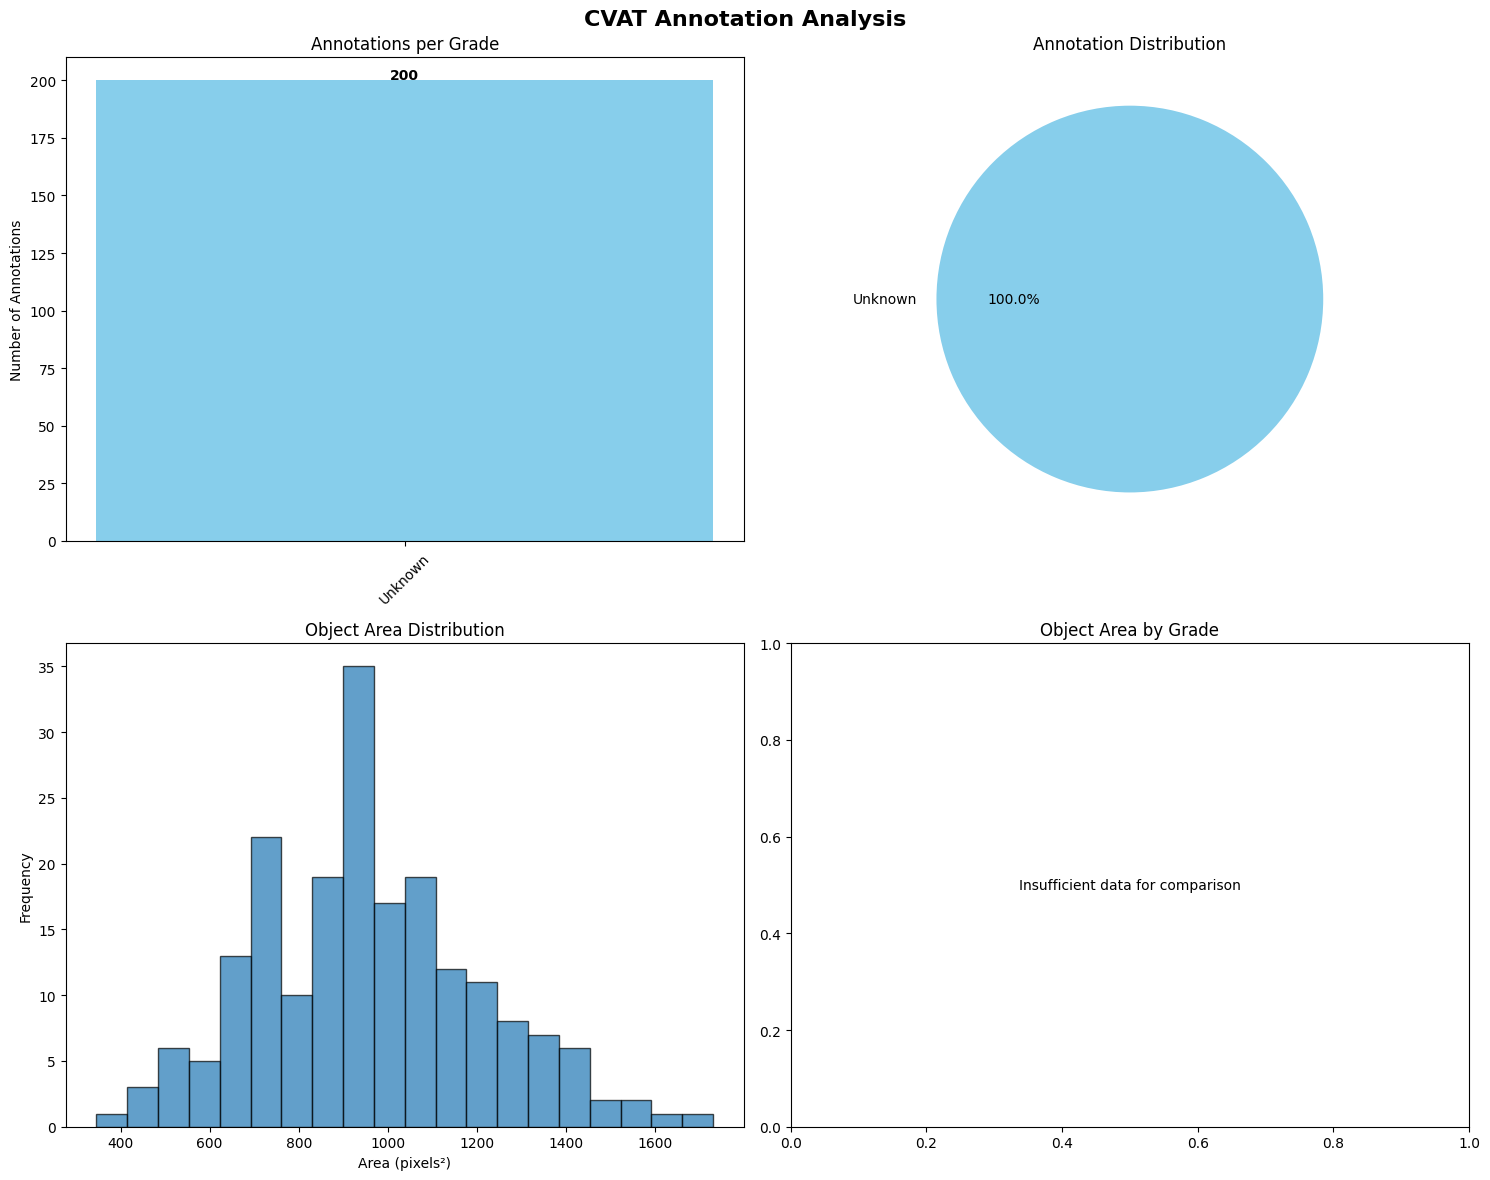

✅ Annotation analysis saved as 'cvat_annotation_analysis.png'

🎨 Generating Segmentation Masks from CVAT Annotations


Processing annotated images: 100%|██████████| 199/199 [00:21<00:00,  9.17it/s]



✅ Successfully processed 199 images with masks
📊 Distribution by grade:
   Unknown: 199 images

✅ Segmentation dataset created at: /kaggle/working/segmentation_data

🧠 TRAINING SEGMENTATION MODEL
📊 Dataset split: 159 training, 40 validation
🚀 Starting Segmentation Training for 30 epochs

Epoch 1/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]

Train Loss: 0.6897, Train Dice: 0.3730


Val Loss: 0.6753, Val Dice: 0.0004
💾 New best model saved! Dice: 0.0004
Learning Rate: 0.000100

Epoch 2/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.4870, Train Dice: 0.8297


Val Loss: 0.4792, Val Dice: 0.0580
💾 New best model saved! Dice: 0.0580
Learning Rate: 0.000100

Epoch 3/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

Train Loss: 0.3052, Train Dice: 0.8910


Val Loss: 0.1685, Val Dice: 0.5857
💾 New best model saved! Dice: 0.5857
Learning Rate: 0.000100

Epoch 4/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]

Train Loss: 0.0491, Train Dice: 0.8879


Val Loss: 0.0383, Val Dice: 0.9114
💾 New best model saved! Dice: 0.9114
Learning Rate: 0.000100

Epoch 5/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]

Train Loss: 0.0357, Train Dice: 0.9154


Val Loss: 0.0700, Val Dice: 0.8340
Learning Rate: 0.000100

Epoch 6/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0433, Train Dice: 0.8973


Val Loss: 0.0895, Val Dice: 0.7848
Learning Rate: 0.000100

Epoch 7/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0317, Train Dice: 0.9255


Val Loss: 0.0323, Val Dice: 0.9241
💾 New best model saved! Dice: 0.9241
Learning Rate: 0.000100

Epoch 8/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0297, Train Dice: 0.9300


Val Loss: 0.0368, Val Dice: 0.9159
Learning Rate: 0.000100

Epoch 9/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0308, Train Dice: 0.9272


Val Loss: 0.0331, Val Dice: 0.9235
Learning Rate: 0.000100

Epoch 10/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0331, Train Dice: 0.9215


Val Loss: 0.0296, Val Dice: 0.9309
💾 New best model saved! Dice: 0.9309
Learning Rate: 0.000100

Epoch 11/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0267, Train Dice: 0.9369


Val Loss: 0.0275, Val Dice: 0.9354
💾 New best model saved! Dice: 0.9354
Learning Rate: 0.000100

Epoch 12/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0274, Train Dice: 0.9349


Val Loss: 0.0401, Val Dice: 0.9101
Learning Rate: 0.000100

Epoch 13/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0273, Train Dice: 0.9356


Val Loss: 0.0310, Val Dice: 0.9282
Learning Rate: 0.000100

Epoch 14/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0282, Train Dice: 0.9336


Val Loss: 0.0312, Val Dice: 0.9263
Learning Rate: 0.000100

Epoch 15/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0269, Train Dice: 0.9365


Val Loss: 0.0241, Val Dice: 0.9437
💾 New best model saved! Dice: 0.9437
Learning Rate: 0.000100

Epoch 16/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0268, Train Dice: 0.9363


Val Loss: 0.0254, Val Dice: 0.9400
Learning Rate: 0.000100

Epoch 17/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0253, Train Dice: 0.9400


Val Loss: 0.0291, Val Dice: 0.9321
Learning Rate: 0.000100

Epoch 18/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0238, Train Dice: 0.9440


Val Loss: 0.0224, Val Dice: 0.9485
💾 New best model saved! Dice: 0.9485
Learning Rate: 0.000100

Epoch 19/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0242, Train Dice: 0.9433


Val Loss: 0.0293, Val Dice: 0.9319
Learning Rate: 0.000100

Epoch 20/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0245, Train Dice: 0.9416


Val Loss: 0.0233, Val Dice: 0.9452
Learning Rate: 0.000100

Epoch 21/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0231, Train Dice: 0.9456


Val Loss: 0.0270, Val Dice: 0.9367
Learning Rate: 0.000100

Epoch 22/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0219, Train Dice: 0.9478


Val Loss: 0.0235, Val Dice: 0.9445
Learning Rate: 0.000100

Epoch 23/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0235, Train Dice: 0.9441


Val Loss: 0.0259, Val Dice: 0.9398
Learning Rate: 0.000100

Epoch 24/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0258, Train Dice: 0.9393


Val Loss: 0.0242, Val Dice: 0.9433
Learning Rate: 0.000050

Epoch 25/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0228, Train Dice: 0.9461


Val Loss: 0.0233, Val Dice: 0.9449
Learning Rate: 0.000050

Epoch 26/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

Train Loss: 0.0253, Train Dice: 0.9401


Val Loss: 0.0244, Val Dice: 0.9421
Learning Rate: 0.000050

Epoch 27/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0248, Train Dice: 0.9410


Val Loss: 0.0213, Val Dice: 0.9495
💾 New best model saved! Dice: 0.9495
Learning Rate: 0.000050

Epoch 28/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0242, Train Dice: 0.9422


Val Loss: 0.0219, Val Dice: 0.9480
Learning Rate: 0.000050

Epoch 29/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]

Train Loss: 0.0222, Train Dice: 0.9475


Val Loss: 0.0211, Val Dice: 0.9505
💾 New best model saved! Dice: 0.9505
Learning Rate: 0.000050

Epoch 30/30
------------------------------


Training: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Train Loss: 0.0220, Train Dice: 0.9480


Val Loss: 0.0216, Val Dice: 0.9492
Learning Rate: 0.000050

✅ Training completed!
🏆 Best validation Dice score: 0.9505


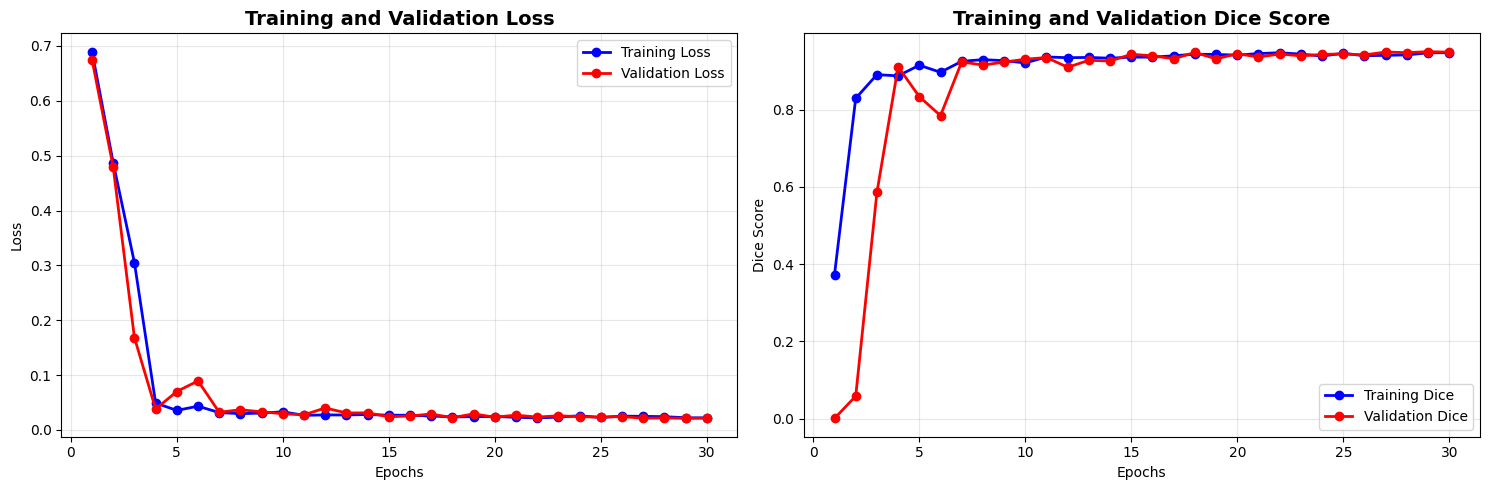

✅ Training curves saved as 'segmentation_training_curves.png'


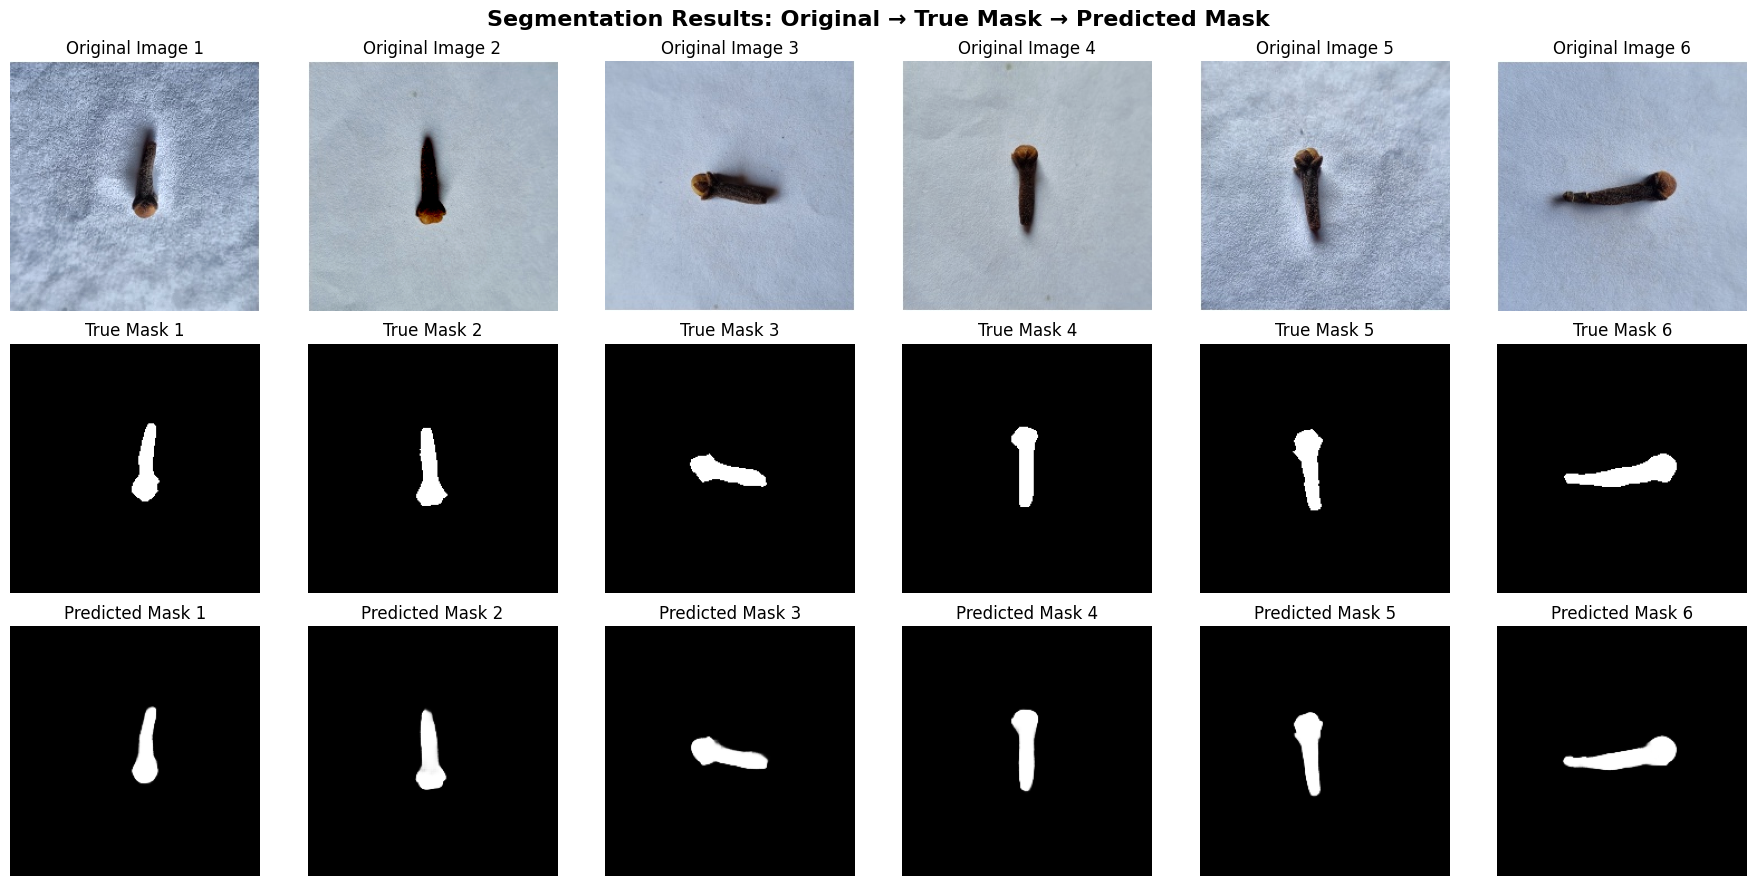

✅ Segmentation results visualization saved as 'segmentation_results_visualization.png'

🔮 GENERATING MASKS FOR FULL DATASET
✅ Loaded trained model from: /kaggle/working/best_segmentation_model.pth
📊 Model validation Dice score: 0.9505

🔄 Processing 224x224 images...


Processing 224x224 folders: 100%|██████████| 4/4 [01:48<00:00, 27.11s/it]



🔄 Processing 512x512 images...


Processing 512x512 folders: 100%|██████████| 4/4 [02:06<00:00, 31.73s/it]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



✅ Generated masks for 9170 images
📁 Masks saved in: /kaggle/working/generated_masks

📊 PREPARING CONTEXT-AWARE DATASET
📈 Found 4585 images with corresponding masks
📊 Dataset split: 2751 train, 917 validation, 917 test
✅ Dataset info saved as 'context_aware_dataset_info.json'



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 162MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


🚀 Starting Classifier Training for 30 epochs

Epoch 1/30
------------------------------


Training: 100%|██████████| 344/344 [00:13<00:00, 25.39it/s]


Train Loss: 0.4418, Train Acc: 0.8455


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.84it/s]


Val Loss: 0.2061, Val Acc: 0.9291
💾 New best model saved! Accuracy: 0.9291

Epoch 2/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.48it/s]


Train Loss: 0.1855, Train Acc: 0.9422


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.69it/s]


Val Loss: 0.0441, Val Acc: 0.9891
💾 New best model saved! Accuracy: 0.9891

Epoch 3/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.50it/s]


Train Loss: 0.0943, Train Acc: 0.9695


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.08it/s]


Val Loss: 0.0873, Val Acc: 0.9695

Epoch 4/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.51it/s]


Train Loss: 0.0974, Train Acc: 0.9680


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.38it/s]


Val Loss: 0.0393, Val Acc: 0.9891

Epoch 5/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.58it/s]


Train Loss: 0.0601, Train Acc: 0.9818


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.37it/s]


Val Loss: 0.0369, Val Acc: 0.9869

Epoch 6/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.50it/s]


Train Loss: 0.0491, Train Acc: 0.9826


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.50it/s]


Val Loss: 0.0289, Val Acc: 0.9880

Epoch 7/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.52it/s]


Train Loss: 0.0580, Train Acc: 0.9807


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.34it/s]


Val Loss: 0.0364, Val Acc: 0.9913
💾 New best model saved! Accuracy: 0.9913

Epoch 8/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.52it/s]


Train Loss: 0.0505, Train Acc: 0.9855


Validating: 100%|██████████| 115/115 [00:02<00:00, 45.74it/s]


Val Loss: 0.0746, Val Acc: 0.9727

Epoch 9/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.54it/s]


Train Loss: 0.0186, Train Acc: 0.9938


Validating: 100%|██████████| 115/115 [00:02<00:00, 43.80it/s]


Val Loss: 0.0265, Val Acc: 0.9924
💾 New best model saved! Accuracy: 0.9924

Epoch 10/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.49it/s]


Train Loss: 0.0380, Train Acc: 0.9876


Validating: 100%|██████████| 115/115 [00:02<00:00, 45.14it/s]


Val Loss: 1.1952, Val Acc: 0.7448

Epoch 11/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.55it/s]


Train Loss: 0.0719, Train Acc: 0.9753


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.24it/s]


Val Loss: 0.0882, Val Acc: 0.9716

Epoch 12/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.52it/s]


Train Loss: 0.0114, Train Acc: 0.9967


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.71it/s]


Val Loss: 0.0407, Val Acc: 0.9847

Epoch 13/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.49it/s]


Train Loss: 0.0356, Train Acc: 0.9891


Validating: 100%|██████████| 115/115 [00:02<00:00, 43.50it/s]


Val Loss: 0.0571, Val Acc: 0.9804

Epoch 14/30
------------------------------


Training: 100%|██████████| 344/344 [00:13<00:00, 26.45it/s]


Train Loss: 0.0319, Train Acc: 0.9909


Validating: 100%|██████████| 115/115 [00:02<00:00, 44.63it/s]


Val Loss: 0.1525, Val Acc: 0.9400

Epoch 15/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.51it/s]


Train Loss: 0.0505, Train Acc: 0.9851


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.15it/s]


Val Loss: 0.0385, Val Acc: 0.9891

Epoch 16/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.48it/s]


Train Loss: 0.0113, Train Acc: 0.9975


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.37it/s]


Val Loss: 0.0198, Val Acc: 0.9935
💾 New best model saved! Accuracy: 0.9935

Epoch 17/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.52it/s]


Train Loss: 0.0077, Train Acc: 0.9989


Validating: 100%|██████████| 115/115 [00:02<00:00, 44.97it/s]


Val Loss: 0.0167, Val Acc: 0.9945
💾 New best model saved! Accuracy: 0.9945

Epoch 18/30
------------------------------


Training: 100%|██████████| 344/344 [00:13<00:00, 26.43it/s]


Train Loss: 0.0059, Train Acc: 0.9985


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.65it/s]


Val Loss: 0.0201, Val Acc: 0.9935

Epoch 19/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.47it/s]


Train Loss: 0.0064, Train Acc: 0.9982


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.72it/s]


Val Loss: 0.0199, Val Acc: 0.9935

Epoch 20/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.51it/s]


Train Loss: 0.0110, Train Acc: 0.9978


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.80it/s]


Val Loss: 0.0391, Val Acc: 0.9902

Epoch 21/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.48it/s]


Train Loss: 0.0027, Train Acc: 0.9996


Validating: 100%|██████████| 115/115 [00:02<00:00, 44.31it/s]


Val Loss: 0.0197, Val Acc: 0.9945

Epoch 22/30
------------------------------


Training: 100%|██████████| 344/344 [00:13<00:00, 26.41it/s]


Train Loss: 0.0013, Train Acc: 1.0000


Validating: 100%|██████████| 115/115 [00:02<00:00, 48.24it/s]


Val Loss: 0.0196, Val Acc: 0.9956
💾 New best model saved! Accuracy: 0.9956

Epoch 23/30
------------------------------


Training: 100%|██████████| 344/344 [00:13<00:00, 26.44it/s]


Train Loss: 0.0008, Train Acc: 1.0000


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.18it/s]


Val Loss: 0.0202, Val Acc: 0.9945

Epoch 24/30
------------------------------


Training: 100%|██████████| 344/344 [00:13<00:00, 26.14it/s]


Train Loss: 0.0052, Train Acc: 0.9985


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.70it/s]


Val Loss: 0.0299, Val Acc: 0.9924

Epoch 25/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.64it/s]


Train Loss: 0.0033, Train Acc: 0.9996


Validating: 100%|██████████| 115/115 [00:02<00:00, 46.81it/s]


Val Loss: 0.0311, Val Acc: 0.9935

Epoch 26/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.56it/s]


Train Loss: 0.0014, Train Acc: 0.9996


Validating: 100%|██████████| 115/115 [00:02<00:00, 48.39it/s]


Val Loss: 0.0268, Val Acc: 0.9935

Epoch 27/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.55it/s]


Train Loss: 0.0020, Train Acc: 0.9996


Validating: 100%|██████████| 115/115 [00:02<00:00, 48.28it/s]


Val Loss: 0.0247, Val Acc: 0.9924

Epoch 28/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.55it/s]


Train Loss: 0.0089, Train Acc: 0.9978


Validating: 100%|██████████| 115/115 [00:02<00:00, 47.07it/s]


Val Loss: 0.0248, Val Acc: 0.9945

Epoch 29/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.47it/s]


Train Loss: 0.0020, Train Acc: 0.9996


Validating: 100%|██████████| 115/115 [00:02<00:00, 41.06it/s]


Val Loss: 0.0222, Val Acc: 0.9935

Epoch 30/30
------------------------------


Training: 100%|██████████| 344/344 [00:12<00:00, 26.47it/s]


Train Loss: 0.0165, Train Acc: 0.9956


Validating: 100%|██████████| 115/115 [00:02<00:00, 39.91it/s]


Val Loss: 0.0248, Val Acc: 0.9924

✅ Training completed!
🏆 Best validation accuracy: 0.9956

✅ Loaded best model from /kaggle/working/best_context_aware_model.pth for evaluation.


Testing: 100%|██████████| 115/115 [00:03<00:00, 34.05it/s]



📊 CLASSIFIER EVALUATION RESULTS
Test Accuracy: 0.9945

Classification Report:
              precision    recall  f1-score   support

     Grade 1       1.00      1.00      1.00       216
     Grade 2       1.00      1.00      1.00       208
     Grade 3       0.99      1.00      1.00       300
     Grade 4       1.00      0.98      0.99       193

    accuracy                           0.99       917
   macro avg       1.00      0.99      0.99       917
weighted avg       0.99      0.99      0.99       917



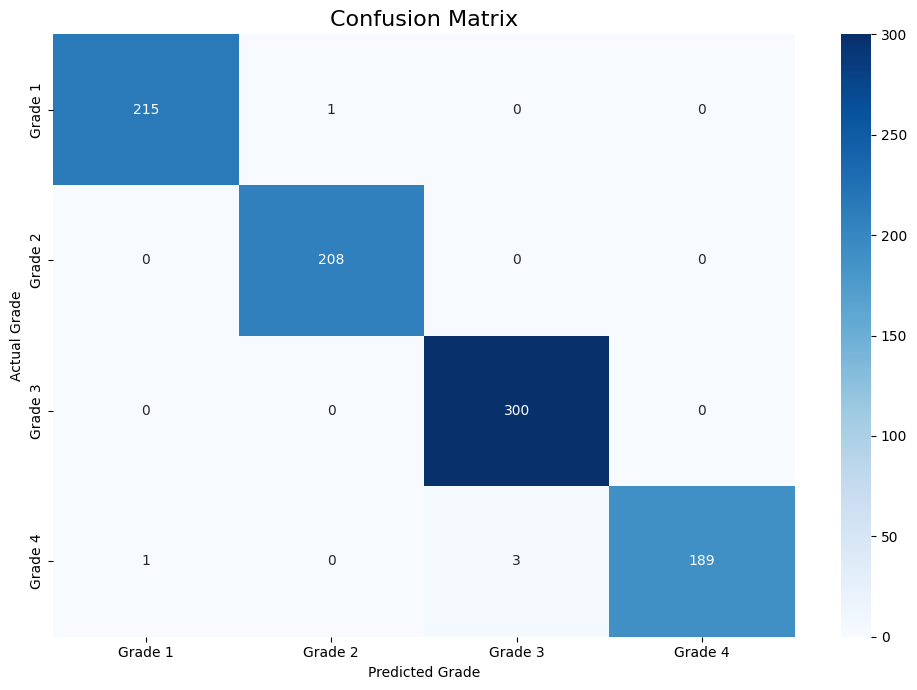

✅ Confusion matrix saved as '/kaggle/working/confusion_matrix.png'


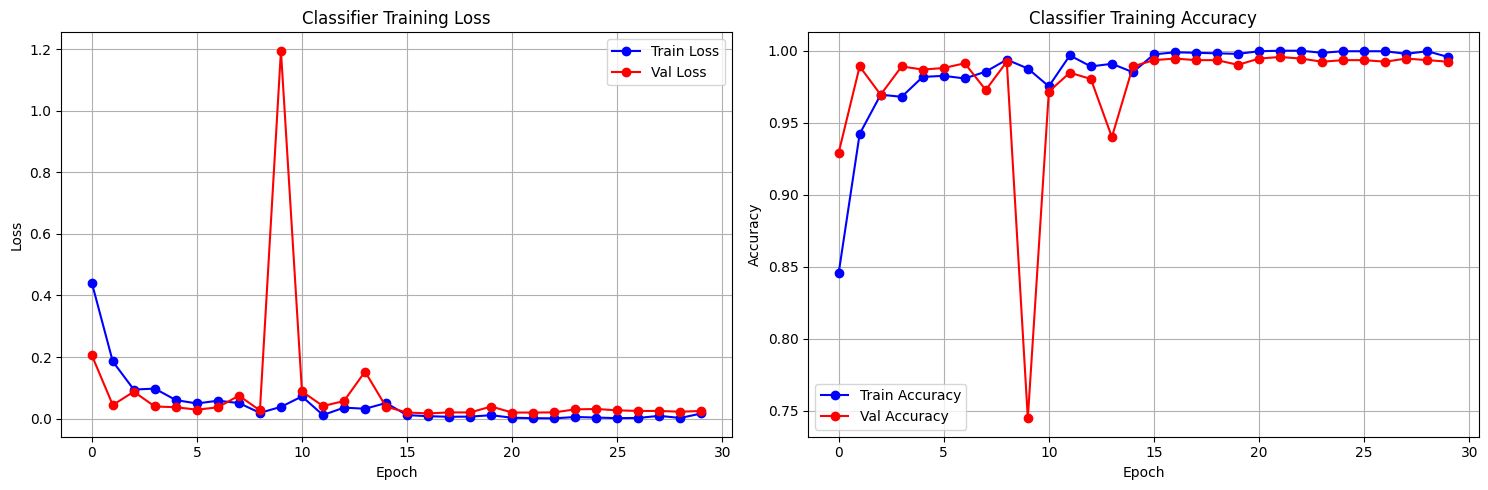


📦 Creating Final Output Packages...
✅ Complete dataset package created: /kaggle/working/complete_context_aware_dataset.zip

📦 Zipping generated masks directory...
📦 Creating zip file: /kaggle/working/generated_masks.zip


Zipping generated_masks: 0it [00:00, ?it/s]
Zipping 224x224: 0it [00:00, ?it/s]
Zipping Grade 4: 100%|██████████| 966/966 [00:00<00:00, 8736.66it/s]
Zipping 512x512: 0it [00:00, ?it/s]
Zipping Grade 4: 100%|██████████| 966/966 [00:00<00:00, 6909.14it/s]

✅ Zip file created successfully: /kaggle/working/generated_masks.zip
📏 Zip file size: 6.91 MB

🎯 PIPELINE COMPLETION SUMMARY
✅ CVAT annotations processed and analyzed
✅ Segmentation masks generated from annotations
✅ U-Net model trained for mask generation
✅ Masks generated for entire dataset
✅ Context-aware dataset prepared
✅ Context-aware classifier trained and evaluated
✅ Complete dataset packaged for download
✅ Generated masks directory zipped

📁 OUTPUT FILES:
   📄 ✅ complete_context_aware_dataset.zip
   📄 ✅ generated_masks.zip
   📄 ✅ best_segmentation_model.pth
   📄 ✅ best_context_aware_model.pth
   📄 ✅ cvat_annotation_analysis.png
   📄 ✅ segmentation_training_curves.png
   📄 ✅ segmentation_results_visualization.png
   📄 ✅ mask_generation_summary.json
   📄 ❌ dataset_info.json (not found)
   📄 ✅ context_aware_dataset_info.json
   📄 ✅ classifier_training_curves.png
   📄 ✅ classifier_evaluation_results.json
   📄 ✅ confusion_matrix.png
{'dataset_path': '/kaggle/working/segmentation_da

In [8]:
if __name__ == "__main__":
    coco_json_path = "/kaggle/input/cvat-clove-annotations/instances_default.json"
    results = run_complete_cvat_pipeline(coco_json_path)
    print(results)


🔬 EXPERIMENT 1: LOSS FUNCTION ABLATION STUDY
🚀 Starting Training for: Combined (BCE + Dice) Loss


Training: 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


Epoch 1/15 - Val Loss: 0.7646, Val Dice: 0.2656
💾 New best model saved with Dice: 0.2656


Training: 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


Epoch 2/15 - Val Loss: 0.6911, Val Dice: 0.2942
💾 New best model saved with Dice: 0.2942


Training: 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


Epoch 3/15 - Val Loss: 0.5898, Val Dice: 0.0240


Training: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


Epoch 4/15 - Val Loss: 0.5211, Val Dice: 0.0044


Training: 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


Epoch 5/15 - Val Loss: 0.4549, Val Dice: 0.2477


Training: 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


Epoch 6/15 - Val Loss: 0.2620, Val Dice: 0.8948
💾 New best model saved with Dice: 0.8948


Training: 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


Epoch 7/15 - Val Loss: 0.0669, Val Dice: 0.8444


Training: 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


Epoch 8/15 - Val Loss: 0.0391, Val Dice: 0.9081
💾 New best model saved with Dice: 0.9081


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 9/15 - Val Loss: 0.0329, Val Dice: 0.9230
💾 New best model saved with Dice: 0.9230


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 10/15 - Val Loss: 0.0333, Val Dice: 0.9223


Training: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


Epoch 11/15 - Val Loss: 0.0270, Val Dice: 0.9365
💾 New best model saved with Dice: 0.9365


Training: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


Epoch 12/15 - Val Loss: 0.0274, Val Dice: 0.9349


Training: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


Epoch 13/15 - Val Loss: 0.0277, Val Dice: 0.9340


Training: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


Epoch 14/15 - Val Loss: 0.0248, Val Dice: 0.9423
💾 New best model saved with Dice: 0.9423


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 15/15 - Val Loss: 0.0270, Val Dice: 0.9365
✅ Training completed for Combined (BCE + Dice) Loss. Best Val Dice: 0.9423
🚀 Starting Training for: BCE Loss Only


Training: 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


Epoch 1/15 - Val Loss: 0.6656, Val Dice: 0.0447
💾 New best model saved with Dice: 0.0447


Training: 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


Epoch 2/15 - Val Loss: 0.5371, Val Dice: 0.0000


Training: 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


Epoch 3/15 - Val Loss: 0.3826, Val Dice: 0.0011


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 4/15 - Val Loss: 0.2766, Val Dice: 0.0000


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 5/15 - Val Loss: 0.1440, Val Dice: 0.4366
💾 New best model saved with Dice: 0.4366


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 6/15 - Val Loss: 0.0331, Val Dice: 0.3832


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 7/15 - Val Loss: 0.0098, Val Dice: 0.8980
💾 New best model saved with Dice: 0.8980


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 8/15 - Val Loss: 0.0073, Val Dice: 0.9253
💾 New best model saved with Dice: 0.9253


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 9/15 - Val Loss: 0.0081, Val Dice: 0.9207


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 10/15 - Val Loss: 0.0124, Val Dice: 0.8856


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 11/15 - Val Loss: 0.0070, Val Dice: 0.9258
💾 New best model saved with Dice: 0.9258


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 12/15 - Val Loss: 0.0057, Val Dice: 0.9405
💾 New best model saved with Dice: 0.9405


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 13/15 - Val Loss: 0.0059, Val Dice: 0.9403


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 14/15 - Val Loss: 0.0059, Val Dice: 0.9377


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 15/15 - Val Loss: 0.0056, Val Dice: 0.9416
💾 New best model saved with Dice: 0.9416
✅ Training completed for BCE Loss Only. Best Val Dice: 0.9416


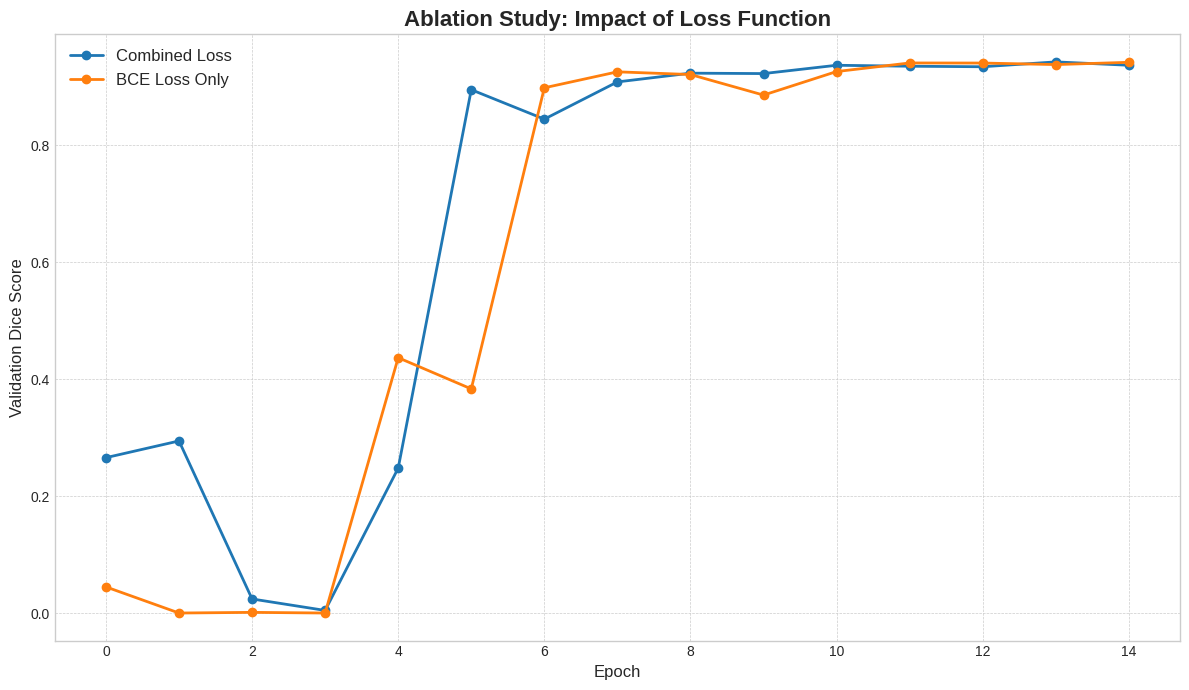

✅ Comparison plot saved to /kaggle/working/ablation_loss_function_comparison.png

🔬 EXPERIMENT 2: AUGMENTATION ABLATION STUDY
🚀 Starting Training for: Without Augmentations


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 1/15 - Val Loss: 0.7215, Val Dice: 0.0000


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 2/15 - Val Loss: 0.6077, Val Dice: 0.0000


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 3/15 - Val Loss: 0.4812, Val Dice: 0.0000


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 4/15 - Val Loss: 0.3982, Val Dice: 0.0353
💾 New best model saved with Dice: 0.0353


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 5/15 - Val Loss: 0.2293, Val Dice: 0.8487
💾 New best model saved with Dice: 0.8487


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 6/15 - Val Loss: 0.0422, Val Dice: 0.9041
💾 New best model saved with Dice: 0.9041


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 7/15 - Val Loss: 0.0383, Val Dice: 0.9124
💾 New best model saved with Dice: 0.9124


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 8/15 - Val Loss: 0.0309, Val Dice: 0.9282
💾 New best model saved with Dice: 0.9282


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 9/15 - Val Loss: 0.0269, Val Dice: 0.9369
💾 New best model saved with Dice: 0.9369


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 10/15 - Val Loss: 0.0249, Val Dice: 0.9414
💾 New best model saved with Dice: 0.9414


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 11/15 - Val Loss: 0.0231, Val Dice: 0.9457
💾 New best model saved with Dice: 0.9457


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 12/15 - Val Loss: 0.0238, Val Dice: 0.9442


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 13/15 - Val Loss: 0.0227, Val Dice: 0.9467
💾 New best model saved with Dice: 0.9467


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 14/15 - Val Loss: 0.0255, Val Dice: 0.9394


Training: 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Epoch 15/15 - Val Loss: 0.0235, Val Dice: 0.9446
✅ Training completed for Without Augmentations. Best Val Dice: 0.9467


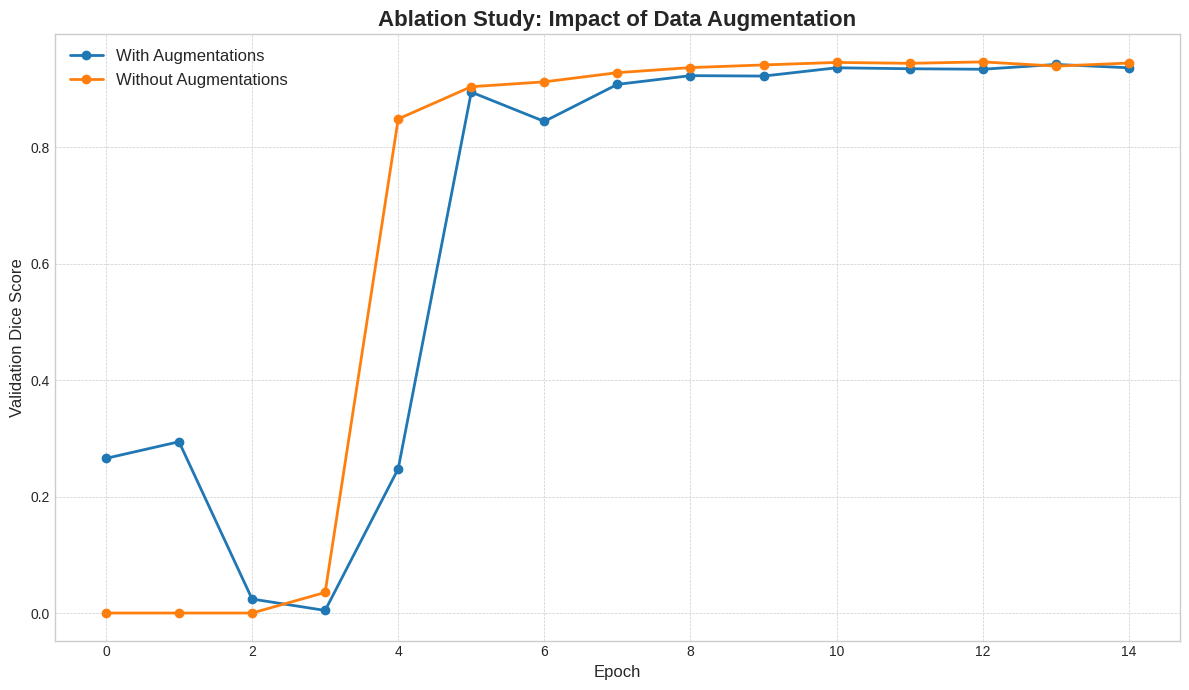

✅ Comparison plot saved to /kaggle/working/ablation_augmentation_comparison.png

📊 ABLATION STUDY FINAL SUMMARY
           Experiment  Best Validation Dice Score
        Combined Loss                    0.942310
        BCE Loss Only                    0.941595
   With Augmentations                    0.942310
Without Augmentations                    0.946669

✅ Full summary saved to ablation_study_summary.csv


In [9]:
import json
import cv2
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2

# =====================================================================
# CORE CLASSES (Re-used from your original script for consistency)
# =====================================================================

class EnhancedUNet(nn.Module):
    """Enhanced U-Net with modern features for better segmentation"""
    
    def __init__(self, in_channels=3, out_channels=1, features=None):
        super(EnhancedUNet, self).__init__()
        
        if features is None:
            features = [64, 128, 256, 512]
        
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        in_ch = in_channels
        for feature in features:
            self.downs.append(EnhancedDoubleConv(in_ch, feature))
            in_ch = feature
        
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(feature*2, feature, kernel_size=2, stride=2)
            )
            self.ups.append(EnhancedDoubleConv(feature*2, feature))
        
        self.bottleneck = EnhancedDoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)
        self.dropout = nn.Dropout2d(0.2)
        
    def forward(self, x):
        skip_connections = []
        
        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)
        
        x = self.bottleneck(x)
        x = self.dropout(x)
        
        skip_connections = skip_connections[::-1]
        
        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2]
            
            if x.shape != skip_connection.shape:
                x = nn.functional.interpolate(x, size=skip_connection.shape[2:])
            
            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)
        
        return torch.sigmoid(self.final_conv(x))

class EnhancedDoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EnhancedDoubleConv, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
        )
        self.relu = nn.ReLU(inplace=True)
        self.residual = nn.Conv2d(in_channels, out_channels, 1, bias=False) if in_channels != out_channels else nn.Identity()
    
    def forward(self, x):
        return self.relu(self.conv(x) + self.residual(x))

class SegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, augment=True):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.augment = augment
        self.images = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        self.base_transform = A.Compose([
            A.Resize(224, 224),
            ToTensorV2()
        ])
        
        if self.augment:
            self.aug_transform = A.Compose([
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.2),
                A.RandomRotate90(p=0.3),
                A.Rotate(limit=20, p=0.3),
                A.RandomBrightnessContrast(p=0.3),
            ])
        else:
            self.aug_transform = None

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.images_dir, img_name)
        mask_name = img_name.replace('.jpg', '_mask.png')
        mask_path = os.path.join(self.masks_dir, mask_name)
        
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        if self.aug_transform:
            augmented = self.aug_transform(image=image, mask=mask)
            image, mask = augmented['image'], augmented['mask']
        
        transformed = self.base_transform(image=image, mask=mask)
        image, mask = transformed['image'], transformed['mask']
        
        image = image.float() / 255.0
        mask = mask.float().unsqueeze(0) / 255.0

        return image, mask

# =====================================================================
# MODIFIED SEGMENTATION TRAINER FOR ABLATION
# =====================================================================

class AblationSegmentationTrainer:
    def __init__(self, model, device, train_loader, val_loader, loss_type='combined'):
        self.model = model.to(device)
        self.device = device
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.loss_type = loss_type  # 'combined' or 'bce_only'
        
        self.bce_loss = nn.BCELoss()
        self.optimizer = optim.AdamW(model.parameters(), lr=1e-4)
        
        self.history = {'train_loss': [], 'val_loss': [], 'train_dice': [], 'val_dice': []}

    def dice_coefficient_loss(self, pred, target, smooth=1e-6):
        pred_flat = pred.view(-1)
        target_flat = target.view(-1)
        intersection = (pred_flat * target_flat).sum()
        return 1 - (2. * intersection + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)

    def calculate_loss(self, pred, target):
        if self.loss_type == 'bce_only':
            return self.bce_loss(pred, target)
        # Default is combined loss
        return 0.7 * self.bce_loss(pred, target) + 0.3 * self.dice_coefficient_loss(pred, target)

    def calculate_dice_score(self, pred, target, threshold=0.5):
        pred_binary = (pred > threshold).float()
        intersection = (pred_binary * target).sum()
        union = pred_binary.sum() + target.sum()
        return (2. * intersection) / union if union > 0 else 1.0

    def train_epoch(self):
        self.model.train()
        total_loss, total_dice = 0, 0
        for images, masks in tqdm(self.train_loader, desc="Training"):
            images, masks = images.to(self.device), masks.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(images)
            loss = self.calculate_loss(outputs, masks)
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()
            total_dice += self.calculate_dice_score(outputs, masks).item()
        return total_loss / len(self.train_loader), total_dice / len(self.train_loader)

    def validate_epoch(self):
        self.model.eval()
        total_loss, total_dice = 0, 0
        with torch.no_grad():
            for images, masks in self.val_loader:
                images, masks = images.to(self.device), masks.to(self.device)
                outputs = self.model(images)
                loss = self.calculate_loss(outputs, masks)
                total_loss += loss.item()
                total_dice += self.calculate_dice_score(outputs, masks).item()
        return total_loss / len(self.val_loader), total_dice / len(self.val_loader)

    def train(self, num_epochs, experiment_name):
        print(f"🚀 Starting Training for: {experiment_name}")
        best_val_dice = 0
        for epoch in range(num_epochs):
            train_loss, train_dice = self.train_epoch()
            val_loss, val_dice = self.validate_epoch()
            
            self.history['train_loss'].append(train_loss)
            self.history['train_dice'].append(train_dice)
            self.history['val_loss'].append(val_loss)
            self.history['val_dice'].append(val_dice)
            
            print(f"Epoch {epoch+1}/{num_epochs} - Val Loss: {val_loss:.4f}, Val Dice: {val_dice:.4f}")
            
            if val_dice > best_val_dice:
                best_val_dice = val_dice
                print(f"💾 New best model saved with Dice: {best_val_dice:.4f}")
        
        print(f"✅ Training completed for {experiment_name}. Best Val Dice: {best_val_dice:.4f}")
        return self.history

# =====================================================================
# ABLATION STUDY ORCHESTRATION
# =====================================================================

def run_ablation_experiment(dataset_path, num_epochs, batch_size, augment, loss_type, experiment_name):
    """A helper function to run a single training experiment."""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Setup dataset and dataloaders
    images_dir = os.path.join(dataset_path, 'images')
    masks_dir = os.path.join(dataset_path, 'masks')
    
    dataset = SegmentationDataset(images_dir, masks_dir, augment=augment)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Initialize model and trainer
    model = EnhancedUNet(in_channels=3, out_channels=1)
    trainer = AblationSegmentationTrainer(model, device, train_loader, val_loader, loss_type=loss_type)
    
    # Train and return history
    history = trainer.train(num_epochs, experiment_name)
    return history

def plot_comparison(histories, title, save_path):
    """Plots validation dice scores for multiple experiments."""
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))
    
    for name, history in histories.items():
        ax.plot(history['val_dice'], 'o-', label=name, linewidth=2)
    
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Validation Dice Score', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    print(f"✅ Comparison plot saved to {save_path}")

def main_ablation_study():
    """Main function to run the complete ablation study."""
    # --- Configuration ---
    DATASET_PATH = "/kaggle/working/segmentation_data"  # Assumes data is pre-generated
    NUM_EPOCHS = 15  # Reduced epochs for faster ablation runs
    BATCH_SIZE = 16

    # Check if the dataset exists
    if not os.path.exists(DATASET_PATH):
        print(f"❌ Dataset not found at '{DATASET_PATH}'.")
        print("Please run your initial data generation pipeline first to create the segmentation dataset.")
        return

    all_histories = {}

    # --- Experiment 1: Loss Function Ablation ---
    print("\n" + "="*60)
    print("🔬 EXPERIMENT 1: LOSS FUNCTION ABLATION STUDY")
    print("="*60)
    
    # Control: Combined Loss (BCE + Dice)
    history_combined_loss = run_ablation_experiment(
        dataset_path=DATASET_PATH, num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
        augment=True, loss_type='combined', experiment_name="Combined (BCE + Dice) Loss"
    )
    all_histories['Combined Loss'] = history_combined_loss

    # Variant: BCE Loss Only
    history_bce_only = run_ablation_experiment(
        dataset_path=DATASET_PATH, num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
        augment=True, loss_type='bce_only', experiment_name="BCE Loss Only"
    )
    all_histories['BCE Loss Only'] = history_bce_only
    
    # Plot Loss Function Comparison
    plot_comparison(
        {'Combined Loss': history_combined_loss, 'BCE Loss Only': history_bce_only},
        'Ablation Study: Impact of Loss Function',
        '/kaggle/working/ablation_loss_function_comparison.png'
    )

    # --- Experiment 2: Augmentation Ablation ---
    print("\n" + "="*60)
    print("🔬 EXPERIMENT 2: AUGMENTATION ABLATION STUDY")
    print("="*60)

    # Control: With Augmentations (re-using from previous run)
    history_with_aug = history_combined_loss
    all_histories['With Augmentations'] = history_with_aug

    # Variant: Without Augmentations
    history_no_aug = run_ablation_experiment(
        dataset_path=DATASET_PATH, num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
        augment=False, loss_type='combined', experiment_name="Without Augmentations"
    )
    all_histories['Without Augmentations'] = history_no_aug

    # Plot Augmentation Comparison
    plot_comparison(
        {'With Augmentations': history_with_aug, 'Without Augmentations': history_no_aug},
        'Ablation Study: Impact of Data Augmentation',
        '/kaggle/working/ablation_augmentation_comparison.png'
    )

    # --- Final Summary ---
    print("\n" + "="*60)
    print("📊 ABLATION STUDY FINAL SUMMARY")
    print("="*60)
    
    summary_data = {
        "Experiment": [],
        "Best Validation Dice Score": []
    }
    for name, history in all_histories.items():
        summary_data["Experiment"].append(name)
        summary_data["Best Validation Dice Score"].append(max(history['val_dice']))
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    summary_df.to_csv("/kaggle/working/ablation_study_summary.csv", index=False)
    print("\n✅ Full summary saved to ablation_study_summary.csv")

# ==================== EXECUTION ====================
# if __name__ == "__main__":
#     # Ensure you have already run the initial pipeline to generate the dataset
#     # in `/kaggle/working/segmentation_data`.
main_ablation_study()

# Zanzibar clove grading rules

🔍 Analyzing group image: /kaggle/input/processed-images-224x224/Group_Grade_2/20250820_103600.jpg
✅ Detected 78 individual cloves

📋 OFFICIAL GRADING RULES CHECK:
--------------------------------------------------
Total cloves detected: 78
Mpeta (Grade 4) count: 53 (67.9%)

✅ INFERRED BATCH GRADE: Grade 4
📘 Rule justification:
   • Max allowed Mpeta: ≤100%
   • Observed Mpeta: 67.9% → ✅ Compliant
   • Expected color: fermented (khoker)
   • May contain headless cloves (allowed in Grade 3+)


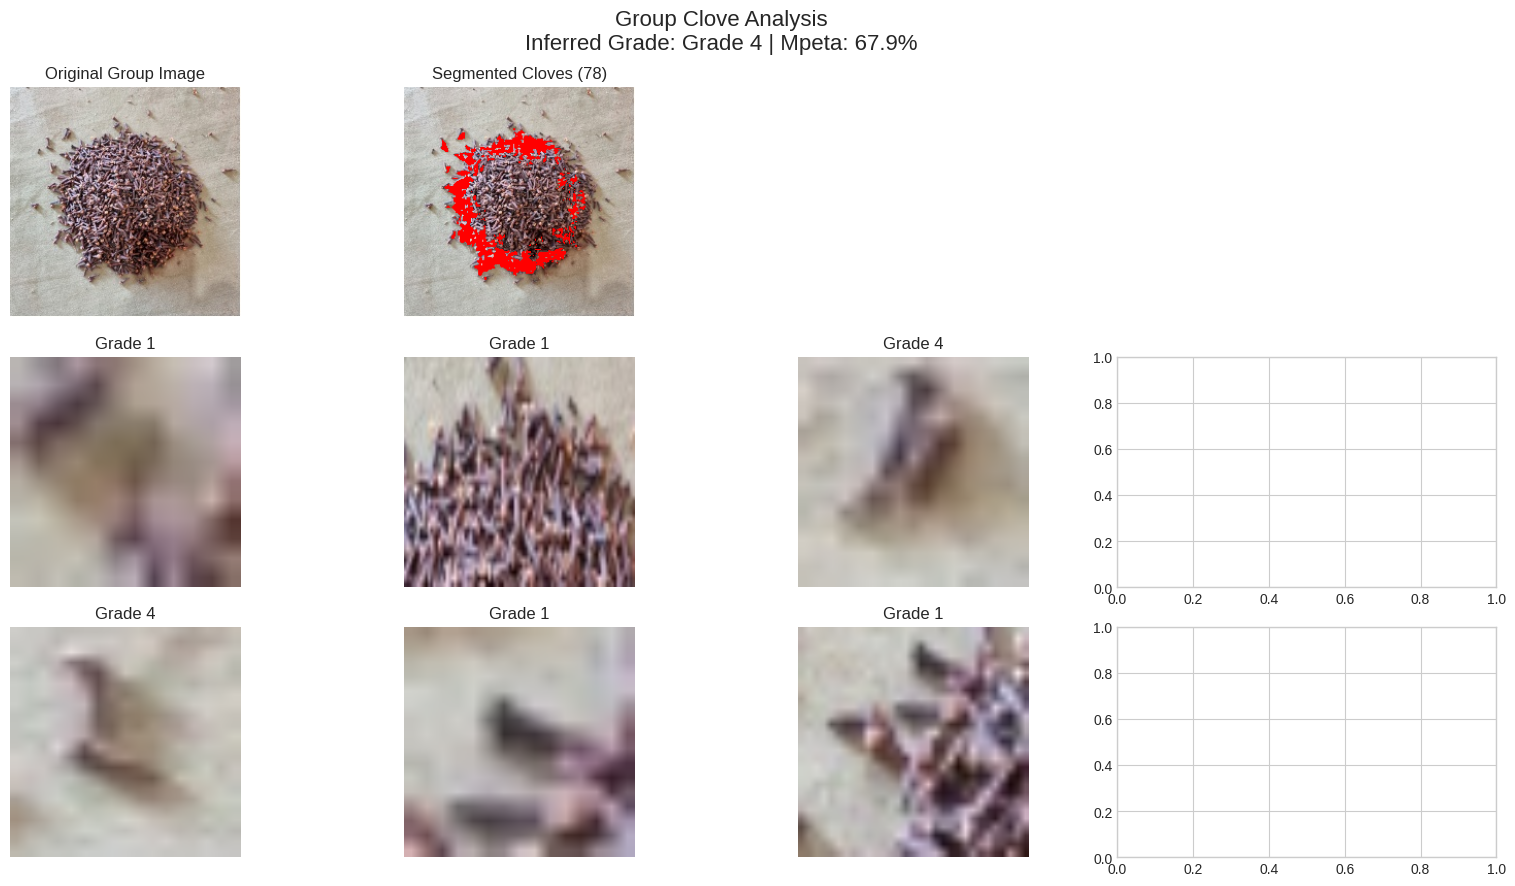


📝 AUDIT TRAIL SUMMARY:
------------------------------
  Grade 1: 25 cloves (32.1%)
  Grade 2: 0 cloves (0.0%)
  Grade 3: 0 cloves (0.0%)
  Grade 4: 53 cloves (67.9%)

🎯 Conclusion: Batch complies with **Grade 4** per ZSTC Mpeta threshold.


In [10]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

# ----------------------------
# LOAD MODELS (adjust if using different architecture)
# ----------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load segmentation model
seg_model = EnhancedUNet(in_channels=3, out_channels=1).to(device)
seg_checkpoint = torch.load("/kaggle/working/best_segmentation_model.pth", map_location=device)
seg_model.load_state_dict(seg_checkpoint['model_state_dict'])
seg_model.eval()

# Load classification model
class ContextAwareClassifier(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()
        from torchvision import models
        self.backbone = models.resnet18(weights=None)
        # Modify first layer for 4 channels (RGB + mask)
        old_conv = self.backbone.conv1
        self.backbone.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)
        with torch.no_grad():
            self.backbone.conv1.weight[:, :3] = old_conv.weight
            self.backbone.conv1.weight[:, 3:4] = old_conv.weight.mean(dim=1, keepdim=True)
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(self.backbone.fc.in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        return self.backbone(x)

cls_model = ContextAwareClassifier(num_classes=4).to(device)
cls_model.load_state_dict(torch.load("/kaggle/working/best_context_aware_model.pth", map_location=device))
cls_model.eval()

# Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406, 0.0],   # mask channel mean ≈ 0 (since binary 0/1)
        std=[0.229, 0.224, 0.225, 1.0]      # mask std = 1 (or 0.5 if scaled to [0,1])
    )
])

grade_names = ["Grade 1", "Grade 2", "Grade 3", "Grade 4"]
grade_rules = {
    "Grade 1": {"max_mpeta_pct": 3, "color": "golden/saffron", "head_required": True},
    "Grade 2": {"max_mpeta_pct": 7, "color": "slightly blackish/faded", "head_required": True},
    "Grade 3": {"max_mpeta_pct": 20, "color": "faded", "head_required": False},
    "Grade 4": {"max_mpeta_pct": 100, "color": "fermented (khoker)", "head_required": False}
}

def analyze_group_image(image_path):
    print(f"🔍 Analyzing group image: {image_path}")
    
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found!")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    # Step 1: Segment all cloves using U-Net
    input_tensor = torch.tensor(image_rgb).permute(2,0,1).unsqueeze(0).float().to(device) / 255.0
    with torch.no_grad():
        seg_mask = seg_model(input_tensor)[0, 0].cpu().numpy()
    
    # Binarize and label connected components
    binary_mask = (seg_mask > 0.5).astype(np.uint8)
    num_labels, labels_im = cv2.connectedComponents(binary_mask)

    if num_labels <= 1:
        print("⚠️ No cloves detected!")
        return

    print(f"✅ Detected {num_labels - 1} individual cloves")

    # Step 2: Extract each clove and classify
    predictions = []
    clove_patches = []

    for label_id in range(1, num_labels):
        # Create instance mask
        instance_mask = (labels_im == label_id).astype(np.uint8)
        
        # Get bounding box
        coords = cv2.findNonZero(instance_mask)
        if coords is None:
            continue
        x, y, w_box, h_box = cv2.boundingRect(coords)
        margin = 5
        x1 = max(0, x - margin)
        y1 = max(0, y - margin)
        x2 = min(image_rgb.shape[1], x + w_box + margin)
        y2 = min(image_rgb.shape[0], y + h_box + margin)

        # Crop image and mask
        cropped_img = image_rgb[y1:y2, x1:x2]  # [H, W, 3], uint8
        cropped_mask = instance_mask[y1:y2, x1:x2]  # [H, W], binary 0/1
        
        # Resize
        cropped_img = cv2.resize(cropped_img, (224, 224))
        cropped_mask = cv2.resize(cropped_mask, (224, 224), interpolation=cv2.INTER_NEAREST)
        
        # Combine into 4-channel uint8 image (RGBA)
        mask_uint8 = (cropped_mask * 255).astype(np.uint8)
        combined = np.concatenate([cropped_img, mask_uint8[..., None]], axis=2)  # [224, 224, 4]
        combined_pil = Image.fromarray(combined, mode='RGBA')
        
        # Transform
        input_cls = transform(combined_pil).unsqueeze(0).to(device)

        # Classify
        with torch.no_grad():
            logits = cls_model(input_cls)
            pred = torch.argmax(logits, dim=1).item()
        
        predictions.append(pred)
        clove_patches.append(cropped_img)

    # Step 3: Count grades
    total = len(predictions)
    counts = Counter(predictions)
    grade_counts = [counts[i] for i in range(4)]
    mpeta_count = grade_counts[3]
    mpeta_pct = (mpeta_count / total) * 100 if total > 0 else 0

    # Step 4: Apply official grading logic
    print("\n📋 OFFICIAL GRADING RULES CHECK:")
    print("-" * 50)
    print(f"Total cloves detected: {total}")
    print(f"Mpeta (Grade 4) count: {mpeta_count} ({mpeta_pct:.1f}%)")
    
    # Determine highest possible grade based on Mpeta %
    inferred_grade = "Grade 4"
    if mpeta_pct <= 3:
        inferred_grade = "Grade 1"
    elif mpeta_pct <= 7:
        inferred_grade = "Grade 2"
    elif mpeta_pct <= 20:
        inferred_grade = "Grade 3"

    # Explain using rules
    rule = grade_rules[inferred_grade]
    print(f"\n✅ INFERRED BATCH GRADE: {inferred_grade}")
    print(f"📘 Rule justification:")
    print(f"   • Max allowed Mpeta: ≤{rule['max_mpeta_pct']}%")
    print(f"   • Observed Mpeta: {mpeta_pct:.1f}% → {'✅ Compliant' if mpeta_pct <= rule['max_mpeta_pct'] else '❌ Non-compliant'}")
    print(f"   • Expected color: {rule['color']}")
    if not rule['head_required']:
        print(f"   • May contain headless cloves (allowed in Grade 3+)")
    
    # Additional note for Grade 1/2
    if inferred_grade in ["Grade 1", "Grade 2"]:
        print(f"   • Must be well-dried, <5% foreign matter, and mostly headed")
        print(f"   • (Note: Full validation requires moisture & foreign matter analysis)")

        # Step 5: Visualization
    fig, axes = plt.subplots(3, 4, figsize=(16, 9))
    fig.suptitle(f"Group Clove Analysis\nInferred Grade: {inferred_grade} | Mpeta: {mpeta_pct:.1f}%", fontsize=16)

    # Original image
    axes[0, 0].imshow(image_rgb)
    axes[0, 0].set_title("Original Group Image")
    axes[0, 0].axis('off')

    # Segmentation overlay
    overlay = image_rgb.copy()
    overlay[binary_mask == 1] = [255, 0, 0]
    axes[0, 1].imshow(overlay)
    axes[0, 1].set_title(f"Segmented Cloves ({total})")
    axes[0, 1].axis('off')

    # Hide unused top-right plots
    for j in [2, 3]:
        axes[0, j].axis('off')

    # Display up to 6 classified cloves
    for i in range(min(6, len(clove_patches))):
        row = 1 + (i // 3)
        col = i % 3
        ax = axes[row, col]
        ax.imshow(clove_patches[i])
        ax.set_title(f"{grade_names[predictions[i]]}")
        ax.axis('off')

    # Hide remaining slots
    for i in range(len(clove_patches), 6):
        row = 1 + (i // 3)
        col = i % 3
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

    # Final audit summary
    print("\n📝 AUDIT TRAIL SUMMARY:")
    print("-" * 30)
    for i, name in enumerate(grade_names):
        pct = (grade_counts[i] / total * 100) if total > 0 else 0
        print(f"  {name}: {grade_counts[i]} cloves ({pct:.1f}%)")
    print(f"\n🎯 Conclusion: Batch complies with **{inferred_grade}** per ZSTC Mpeta threshold.")

# ----------------------------
# EXAMPLE USAGE
# ----------------------------
test_image = "/kaggle/input/processed-images-224x224/Group_Grade_2/20250820_103600.jpg"
analyze_group_image(test_image)